# Twitter Sentiment Analysis of Canadian political landscape in 2019

### By Gautam Dawar

# INDEX of Notebook

### 0.	NOTEBOOK PREPARATION
    0.1	IMPORTING LIBRARIES
    0.2	DEFINING FUNCTIONS
### 1.	DATA PREPARATION
    1.1	Checking for null values
    1.2	Cleaning the tweets
### 2.	DATA EXPLORATION
### 3.	MODEL PREPARATION ON SETIMENTS.CSV
    3.1	Trying multiple classification algorithms with hyper parameter tuning and cross val.
        3.1.1	Logistic regression with hyp. param. tuning
        3.1.2	k-NN with hyp. param. tuning
        3.1.3	Naive Bayes with hyp. param. tuning
        3.1.4	SVM with hyp. param. tuning
        3.1.5	decision trees with hyp. param. tuning
        3.1.6	Random Forest with hyp. param. tuning
        3.1.7	XGBoost with hyp. param. tuning
    3.2	Analysing the accuracy results of all the models

### 4.	MODEL IMPLIMENTATION ON ELECTIONS
    4.1	TF on Election Dataset
    4.2	General tweet Model Implementation and testing on Election Dataset
    4.3	Prediction Results Exploration
### 5.	MODEL IMPLIMENTATION ON ELECTIONS TO CLASSIFY 'NEGATIVE REASON' OF ELECTION TWEETS
    5.1	Exploring the negative reasons
    5.2	Combining negative reason Categories
    5.3	Implementing classification models
### 6.	RESULTS
### 7.	BONUS
    7.1	Using Word2Vec Model instead of TF (Bag of Words)
        7.1.1 Implementing All the classification models with w2v (Logistic Regression, SVM, decision tree, random forest, XG Boost)
    7.2	Implementing N-Grams in Bag of Words and TF IDF
        7.2.1	Implementing All the classification models with N-Grams (Logistic Regression, SVM, decision tree, random forest, XG Boost)
        7.2.2	Implementing Log reg general model with ngrams on elections data set


# 0. NOTEBOOK PREPARATION -------------------------------------------------------------------

## 0.1. IMPORTING LIBRARIES

In [ ]:
## Importing Libraries

import pandas as pd
import numpy as np
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer

import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

#import OS package to interact with file paths/OS commands
import os
#import re package for the use of regular expressions
import re
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

import matplotlib.gridspec as gridspec
from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

import html

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=fb72625434b7a182bb03cf22f1ee4a82593675084bea5a3ce563e61a87b94e66
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 109.8MB 74kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## 0.2 DEFINING FUNCTIONS

In [ ]:
def remove_url(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove URLs from
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """ 
    tweet = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", tweet)
    
    return tweet    

In [ ]:
def remove_twitter_handles(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove twitter handle references from
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """     
    
    tweet = " ".join(filter(lambda y:y[0]!='@', tweet.split()))
    
    return tweet

In [ ]:
def convert_html_ascii(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to  replace Html character codes (i.e., &...;) with an ASCII equivalent
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """     

    html.unescape(tweet)
    
    return tweet

In [ ]:
def lowercase(tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to be lowercased
    
    PARAMETERS:
        - tweet = tweet string
    
    RETURN:
        - lowercased tweet
    """     
    tweet = tweet.lower()
    return tweet

In [ ]:
def char_remove(tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove unwanted symbols from the string
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """     
    tweet = tweet.lstrip("b'")
    tweet = tweet.lstrip('b"')

In [ ]:
def remove_punctuation(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to convert to remove punctuation
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """    
        
    tweet  = "".join([char for char in tweet if char not in string.punctuation]) #removing punctuation marks
    tweet = re.sub('[0-9]+', '', tweet) #replacing all numbers by a ''
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'_[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'&[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'http[A-Za-z0-9]+','',tweet)
    return tweet

In [ ]:
def delete_non_ascii(tweet):
    
    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to delete all the non acsii characters like 'â€¦''
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """    
    
    tweet = ''.join(c for c in tweet if ord(c) < 128)
    
    return tweet

In [ ]:
ps = nltk.PorterStemmer()

def stemming(tokenised_tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tokeninsed tweet to be stemmed
        
    PARAMETERS:
        - tweet = tokenized tweet to clean
    
    RETURN:
        - cleaned tweet tokenized
    """     
    
    
    stemmed_tweet = [ps.stem(word) for word in tokenised_tweet]
    return stemmed_tweet

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(tokenised_tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tokenized tweet to lemmatize
    
    PARAMETERS:
        - tweet = tweet to clean tokenized
    
    RETURN:
        - cleaned tweet tokenized
    """         

    lemmatized_tweet = [wn.lemmatize(word) for word in tokenised_tweet]
    return lemmatized_tweet

In [ ]:
def remove_stop_words_v2(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove stop words like a, an, the etc
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """    
    s1 = ' '
    tokenizer = RegexpTokenizer(r'\w+')         
    tokenised_tweet = tokenizer.tokenize(tweet)
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(['ur', 'yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'yearold', 'fu', 
                     'week','day', 'b', 'xf', 'n', 'rt', 'amp', 'xf0', 'x9f', 'x87', 'xa8', 'xa6', 'xa8', 'xe2', 'x80', 'x9ci', 
                     'x9d', 'x99s', 'x99t', 'x9cthe'])
    stopword.extend(extra_stop_words)
    stopword = list(set(stopword))
        
    words_rmStop = [word for word in tokenised_tweet if word not in stopword] # remove stop words
    tweet_no_stop_words = s1.join(words_rmStop)
    
    return tweet_no_stop_words
    

In [ ]:
def strange_tweet(tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove unwanted character combinations
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """        
       
    tweet = tweet.replace('\n', r'') 
    tweet = tweet.replace('\n\n', r'')   
    tweet = tweet.replace('\\n\\n', r'')    
    tweet = tweet.replace('\\n', r'')    
    tweet = tweet.replace('\xe2\x80\x99', r'')
    tweet = tweet.replace('\\xe2\\x80\\x99', r'')
    tweet = tweet.replace('\\xe2\\x80\\x98', r'')
    tweet = tweet.replace('\\xe2\\x80\\x99', r'')    
    tweet = tweet.replace('\xe2\x80\x98', r'')    
    tweet = tweet.replace('\xe2\x80\x9c', r'')    
    tweet = tweet.replace('\xe2\x80\x9d', r'')    
    tweet = tweet.replace('\xe2\x80\x9e', r'')    
    tweet = tweet.replace('\xe2\x80\x9f', r'')    
    tweet = tweet.replace('\xe2\x80\x9c', r'') 
    tweet = tweet.replace('\xe2\x80\x98', r'') 
    tweet = tweet.replace('\xe2\x80\xb2', r'') 
    tweet = tweet.replace('\xe2\x80\x9b', r'') 
    tweet = tweet.replace('\xe2\x80\xb3', r'') 
    tweet = tweet.replace('\xe2\x80\xb4', r'') 
    tweet = tweet.replace('\xe2\x80\xb5', r'') 
    tweet = tweet.replace('\xe2\x80\xb6', r'') 
    tweet = tweet.replace('\xe2\x80\xb7', r'')  
    tweet = tweet.replace('\xe2\x81\xbb', r'')  
    tweet = tweet.replace('\xe2\x81\xbd', r'')  
    tweet = tweet.replace('\xe2\x81\xbe', r'')  
    tweet = tweet.replace('\\xe2\\x98\\xb9\\xef\\xb8\\x8f', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\xa7\\xa1\\xf0\\x9f\\xa7\\xa1', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\x87\\xa8\\xf0\\x9f\\x87\\xa6', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\xa4\\xa6\\xe2\\x80\\x8d\\xe2\\x99\\x82\\xef\\xb8\\x8f', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\x90\\x8e', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\x90\\x8e', r'')  
    tweet = tweet.replace('\\xc2\\xa0', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\x98\\x8b', r'')  
    tweet = tweet.replace('\\xe2\\x9d\\x93', r'')  
    tweet = tweet.replace('\\xe2\\x9d\\x93', r'')  
    tweet = tweet.replace('\\xf0\\x9f\\xa7\\xa1\\xf0\\x9f\\xa7\\xa1', r'')
    tweet = tweet.replace('\\xe2\\x9e\\xa1\\xef\\xb8\\x8f', r'')
    tweet = tweet.replace('\\xf0\\x9f\\x98\\x8f', r'')
    tweet = tweet.replace('\\xf0\\x9f\\x87\\xa8\\xf0\\x9f\\x87\\xa6', r'')
    tweet = tweet.replace('\\xf0\\x9f\\x92\\x81\\xf0\\x9f\\x99\\x8a\\xf0\\x9f\\x8d\\xbb', r'')
    tweet = tweet.replace('\\xf0\\x9f\\x8f\\xbc', r'')
    
    return tweet



In [ ]:
def detokenize(tokenised_tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tokenized tweet to detokenize
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet detokenized
    """    
    s1 = ' '
    tweet_detokenised = s1.join(tokenised_tweet)
    
    return tweet_detokenised

In [ ]:
def logistic_regression(X, y, test_size=0.3, param = {'C':[0.01,0.05,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=5):
    """
    APPLICATION OF THE FUNCTION:
        to execute logistic regression with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - C = lambda value for l2 regularization
        - solver = solver to execute optimization function
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
    RETURN:
        - logreg_report, logreg_acc, logreg_confusion, logreg_f1_score, logreg_model.predict(X), best score and paramters
    """    
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    
    
    logreg_model = LogisticRegression()
    logreg_model_gridtune = GridSearchCV(logreg_model, param, cv=cv, verbose=0, scoring='accuracy')
    lr_grid = logreg_model_gridtune.fit(X_train_senti, y_train_senti)
    logreg_pred = lr_grid.predict(X_test_senti)
    
    logreg_report = classification_report(y_test_senti,logreg_pred)
    logreg_acc = accuracy_score(y_test_senti, logreg_pred)
    logreg_confusion = confusion_matrix(y_test_senti, logreg_pred)
    logreg_f1_score = f1_score(y_test_senti, logreg_pred, average='weighted')
    bs = logreg_model_gridtune.best_score_
    bp = logreg_model_gridtune.best_params_
    
    return logreg_report, logreg_acc, logreg_confusion, logreg_f1_score, lr_grid.predict(X), bs, bp

In [ ]:
def knn(X, y, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute logistic regression with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - n_neighbors = number of neighbours to evaluate
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
    RETURN:
        - knn_report, knn_acc, knn_confusion, knn_f1_score, knn_model.predict(X), best score and paramters
    """ 
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    knn_model = KNeighborsClassifier()
    knn_model_gridtune = GridSearchCV(knn_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train_senti, y_train_senti)
    knn_model_pred = knn_model_gridtune.predict(X_test_senti)
    
    knn_report = classification_report(y_test_senti, knn_model_pred)
    knn_acc = accuracy_score(y_test_senti, knn_model_pred)
    knn_confusion = confusion_matrix(y_test_senti, knn_model_pred)
    knn_f1_score = f1_score(y_test_senti, knn_model_pred, average='weighted')
    bs = knn_model_gridtune.best_score_
    bp = knn_model_gridtune.best_params_
    
    return knn_report, knn_acc, knn_confusion, knn_f1_score, knn_model_gridtune.predict(X), bs, bp

In [ ]:
def naive_bayes_multinomial(X, y, alpha=1.0, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute naive bayes classification (cannot perform hyperparameter tuning)
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - alpha = 1.0 = Additive (Laplace/Lidstone) smoothing parameter
        - test_size = 0.3 = testing size of the overall data set
    RETURN:
        - naive_bayes_multinomial_report, naive_bayes_multinomial_acc, naive_bayes_multinomial_confusion, naive_bayes_multinomial_f1_score, naive_bayes_multinomial_model.predict(X), best score and paramters
    """ 
    
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    naive_bayes_multinomial_model = MultinomialNB(alpha=alpha)
    naive_bayes_multinomial_model.fit(X_train_senti,y_train_senti)
    naive_bayes_multinomial_model_pred = naive_bayes_multinomial_model.predict(X_test_senti)
    naive_bayes_multinomial_report = classification_report(y_test_senti, naive_bayes_multinomial_model_pred)
    naive_bayes_multinomial_acc = accuracy_score(y_test_senti, naive_bayes_multinomial_model_pred)
    naive_bayes_multinomial_confusion = confusion_matrix(y_test_senti, naive_bayes_multinomial_model_pred)
    naive_bayes_multinomial_f1_score = f1_score(y_test_senti, naive_bayes_multinomial_model_pred, average='weighted') 
    
    return naive_bayes_multinomial_report, naive_bayes_multinomial_acc, naive_bayes_multinomial_confusion, naive_bayes_multinomial_f1_score, naive_bayes_multinomial_model.predict(X)

In [ ]:
def linear_svc(X, y, param = {'C':[0.01,0.05,0.1,0.5,0.2,1]}, cv = 5, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute linear SVC classification using SVM with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - C = Regularization parameter. The strength of the regularization is inversely proportional to C
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
    RETURN:
        - linear_svc_report, linear_svc_acc, linear_svc_confusion, linear_svc_f1_score, linear_svc_model.predict(X), best score and paramters
    """     
    
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    linear_svc_model = LinearSVC()
    linear_svc_model_gridtune = GridSearchCV(linear_svc_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train_senti, y_train_senti)
    linear_svc_model_pred = linear_svc_model_gridtune.predict(X_test_senti)
    
    linear_svc_report = classification_report(y_test_senti, linear_svc_model_pred)
    linear_svc_acc = accuracy_score(y_test_senti, linear_svc_model_pred)
    linear_svc_confusion = confusion_matrix(y_test_senti, linear_svc_model_pred)
    linear_svc_f1_score = f1_score(y_test_senti, linear_svc_model_pred, average='weighted') 
    bs = linear_svc_model_gridtune.best_score_
    bp = linear_svc_model_gridtune.best_params_
    
    return linear_svc_report, linear_svc_acc, linear_svc_confusion, linear_svc_f1_score, linear_svc_model_gridtune.predict(X), bs,bp

In [ ]:
def decision_trees(X, y, param = {'criterion':['gini', 'entropy']}, cv=5, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute decision tree classification with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
        - criterion = The function to measure the quality of a split
    RETURN:
        - decision_trees_report, decision_trees_acc, decision_trees_confusion, decision_trees_f1_score, decision_trees_model.predict(X), best score and paramters
    """   
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    decision_trees_model = DecisionTreeClassifier()
    decision_trees_model_gridtune = GridSearchCV(decision_trees_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train_senti, y_train_senti)
    decision_trees_model_pred = decision_trees_model_gridtune.predict(X_test_senti)
    
    decision_trees_report = classification_report(y_test_senti, decision_trees_model_pred)
    decision_trees_acc = accuracy_score(y_test_senti, decision_trees_model_pred)
    decision_trees_confusion = confusion_matrix(y_test_senti, decision_trees_model_pred)
    decision_trees_f1_score = f1_score(y_test_senti, decision_trees_model_pred, average='weighted') 
    bs = decision_trees_model_gridtune.best_score_
    bp = decision_trees_model_gridtune.best_params_
    
    return decision_trees_report, decision_trees_acc, decision_trees_confusion, decision_trees_f1_score, decision_trees_model_gridtune.predict(X),bs,bp

In [ ]:
def random_forest(X, y, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100, 200]}, cv = 5, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute random forest classification with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - n_estimators = The number of trees in the forest.
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
        - criterion = The function to measure the quality of a split
    RETURN:
        - random_forest_report, random_forest_acc, random_forest_confusion, random_forest_f1_score, random_forest_model.predict(X), best score and paramters
    """  
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
    random_forest_model = RandomForestClassifier(random_state=1624)
    random_forest_model_gridtune = GridSearchCV(random_forest_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train_senti, y_train_senti)
    random_forest_model_pred = random_forest_model_gridtune.predict(X_test_senti)  
    
    random_forest_report = classification_report(y_test_senti, random_forest_model_pred)
    random_forest_acc = accuracy_score(y_test_senti, random_forest_model_pred)
    random_forest_confusion = confusion_matrix(y_test_senti, random_forest_model_pred)
    random_forest_f1_score = f1_score(y_test_senti, random_forest_model_pred, average='weighted') 
    bs = random_forest_model_gridtune.best_score_
    bp = random_forest_model_gridtune.best_params_
    
    return random_forest_report, random_forest_acc, random_forest_confusion, random_forest_f1_score, random_forest_model_gridtune.predict(X), bs,bp

In [ ]:
def xgboost(X, y, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 5, test_size=0.3):
    """
    APPLICATION OF THE FUNCTION:
        to execute XG boost classification based on parallel tree boosting with hyperparameter tunining with grid search
    
    PARAMETERS:
        - X = Feature data after word processing
        - y = target data after word processing
        - test_size = 0.3 = testing size of the overall data set
        - cv = cross validation folds
        - learning_rate = learning rate of the xg boost
    RETURN:
        - xgboost_model_report, xgboost_model_acc, xgboost_model_confusion, xgboost_model_f1_score, xgboost_model.predict(X), best score and paramters
    """      
    X_train_senti, X_test_senti, y_train_senti, y_test_senti = train_test_split(X,y,test_size=test_size, 
                                                                                random_state=1624, stratify=y)
   
    xgboost_model = XGBClassifier(random_state=1624)
    xgboost_model_gridtune = GridSearchCV(xgboost_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train_senti, y_train_senti)
    xgboost_model_pred = xgboost_model_gridtune.predict(X_test_senti)
    
    xgboost_model_report = classification_report(y_test_senti, xgboost_model_pred)
    xgboost_model_acc = accuracy_score(y_test_senti, xgboost_model_pred)
    xgboost_model_confusion = confusion_matrix(y_test_senti, xgboost_model_pred)
    xgboost_model_f1_score = f1_score(y_test_senti, xgboost_model_pred, average='weighted') 
    bs = xgboost_model_gridtune.best_score_
    bp = xgboost_model_gridtune.best_params_
    
    return xgboost_model_report, xgboost_model_acc, xgboost_model_confusion, xgboost_model_f1_score, xgboost_model_gridtune.predict(X), bs,bp

In [ ]:
def word2vec_builder(tweet, size):
    """
    APPLICATION OF THE FUNCTION:
        to add and average out all vectorized words together from a particular tweet
    
    PARAMETERS:
        - tweet = tweet to input
        - size = vector space dimension for the tweet
    RETURN:
        - vectrized tweet
    """      
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if tweet == '':
        return vec
    else:
        tweet = tweet.split(' ')
        for word in tweet:
            vec += model_word2vec[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

# 1. DATA PREPARATION ----------------------------------------------------------------------------

In [ ]:
#### Downloading the sentiments dataset -------------------------------------------------------
df_original = pd.read_csv('Sentiment.csv')
df = df_original.copy() # creating a copy of the dataframe

#### Downloading the election 2019 dataset -------------------------------------------------------
df_canadian_original = pd.read_csv('Canadian_elections_2019.csv')
df_canadian_elec = df_canadian_original.copy() # creating a copy of the dataframe

#### Downloading the stop words dataset -------------------------------------------------------
with open('stop_words.txt', 'r') as f:
    extra_stop_words = f.read().splitlines()

## ------------------------------------ Sentiments.csv ------------------------------------

In [ ]:
### exploring the raw data frame -------------------------------------------------------
pd.options.display.max_colwidth = 100
df

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrock...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd"
4,Positive,@salspizza just spotted ur message there Tony and have replied
...,...,...
133806,Positive,"@scottw Nice, I have the 20/20 but to be honest I don't think I really need the 20 up unless you..."
133807,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich wins it. 74.5% positive sentiment. http://t.co/Cpq...
133808,Negative,@amtrack i am sorry .... i love you tho and thats all that matters hahahaha
133809,Positive,@RazorTV http://tinyurl.com/d96txo - Champions League ∩┐╜25 free bet


## ------------------------------------ Canadian Elections 2019 ------------------------------------

In [ ]:
### exploring the raw data frame -------------------------------------------------------
pd.options.display.max_colwidth = 100
df_canadian_elec

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not a..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #el..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpo..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttp..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate wel..."
...,...,...,...
2128,Negative,Scandal,"b'You know he was doing a good enough job smearing his own campaign, right @AndrewScheer? #cdnpo..."
2129,Negative,Scandal,b'You missed the comment. Deflecting the issue does not answer. Best response is like your agent...
2130,Positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endorses strategic voting\n#elxn43 #elxn2019 #CDNpoli #...
2131,Negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debate...\xf0\x9f\x98\x8f\n#elxn43 #ScheerLies #ScheerH...


## 1.1 Checking for null values

## ------------------------------------ Sentiments.csv ------------------------------------

### Using MSNO to visualise the missing values

Text(0.5, 1.0, 'Missing data visualization across the dataframe')

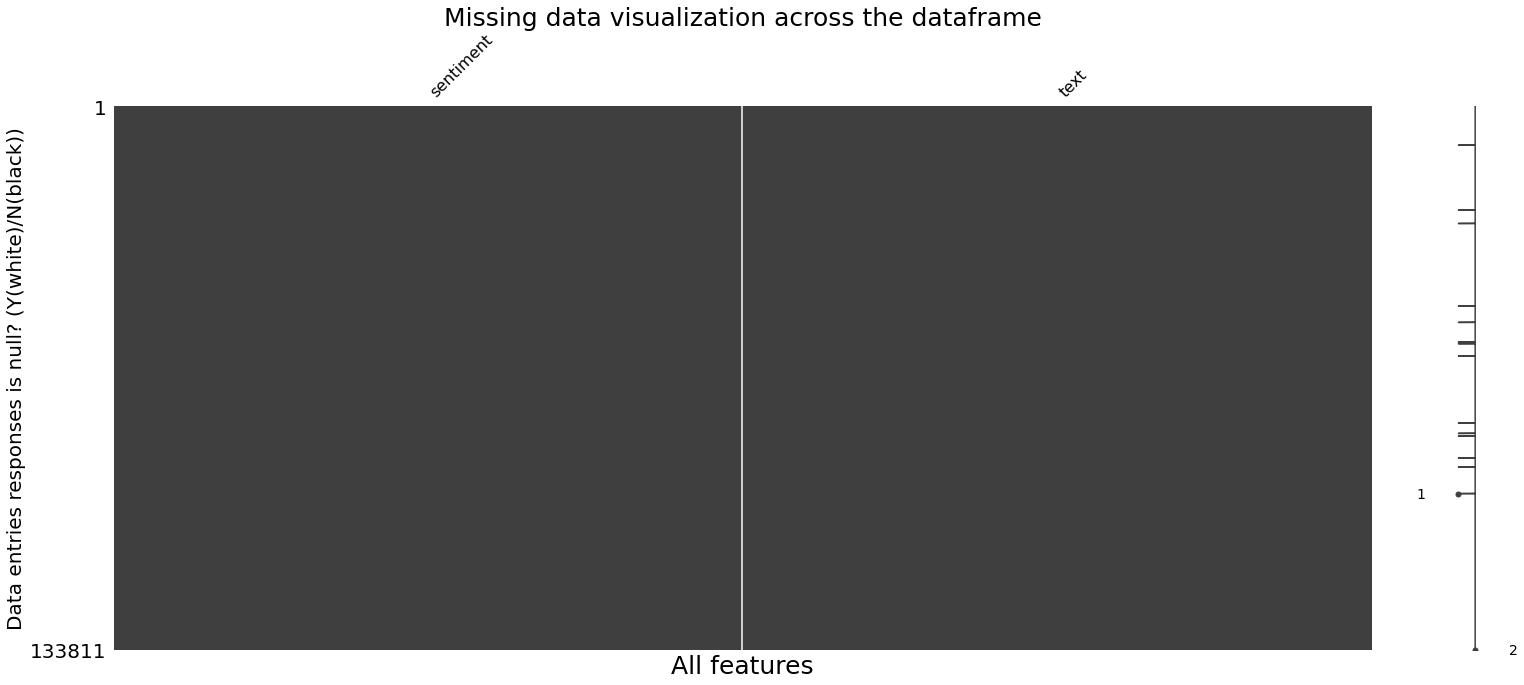

In [ ]:
### checking for null values -------------------------------------------------------
ax = msno.matrix(df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

### Observation:

the verticle line on the extreme right shows the row-wise plot of the null values. As we can see, there are a few null values. Hence exploring futher using .isnull() function in the dataframe

### Further Investigating the null values - 

In [ ]:
### checking missing values in each features -------------------------------------------------------
missing_value_count = df.isna().sum().sort_values(ascending=False)
missing_value_count #type = pandas series

text         14
sentiment     0
dtype: int64

In [ ]:
### checking the entries in the text column against the 14 missing values ---------------------------------------------------

missing_text_list = df[df['text'].isnull()].index.tolist()
df.ix[missing_text_list]

,sentiment,text
9607,Positive,NaN
25587,Negative,NaN
28867,Positive,NaN
49199,Negative,NaN
53215,Negative,NaN
58074,Negative,NaN
58454,Positive,NaN
61503,Negative,NaN
77999,Negative,NaN
80539,Negative,NaN


In [ ]:
### checking the percentage of the missing values with respect to rest of the data ---------------------------------

missing_value_count_sum = df['text'].isna().sum()
totalcells = np.product(df.shape)
totalmissing = missing_value_count_sum.sum()


print ('Total Missing values percentage in the dataframe are = ',"{0:.3%}".format(totalmissing/totalcells),'\n')

Total Missing values percentage in the dataframe are =  0.005% 



### Observation:

The text column has a few missing values which amount to be 0.005% of the entire data in the column. Hence we can safely drop these rows without affecting the coherence of our dataframe

### Dropping missing values

In [ ]:
df = df.drop(df.index[missing_text_list])
df = df.reset_index(drop = True)

### Final Data check for missing values

Text(0.5, 1.0, 'Missing data visualization across the dataframe')

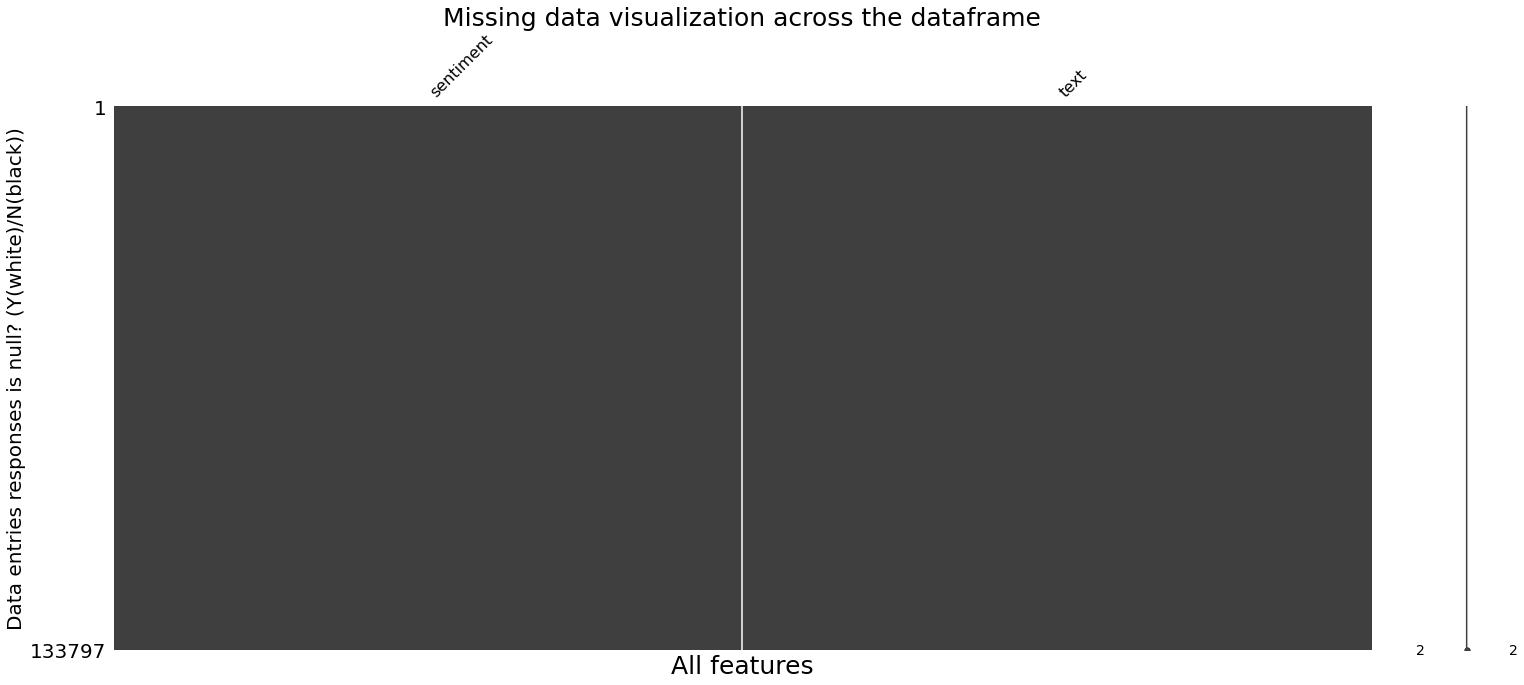

In [ ]:
ax = msno.matrix(df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

### Observation:

the verticle line on the extreme right shows the row-wise plot of the null values. As we can see, the line is completely flat and there are no missing values

## ------------------------------------ Canadian Elections 2019 ------------------------------------

### Using MSNO to visualise the missing values

Text(0.5, 1.0, 'Missing data visualization across the dataframe')

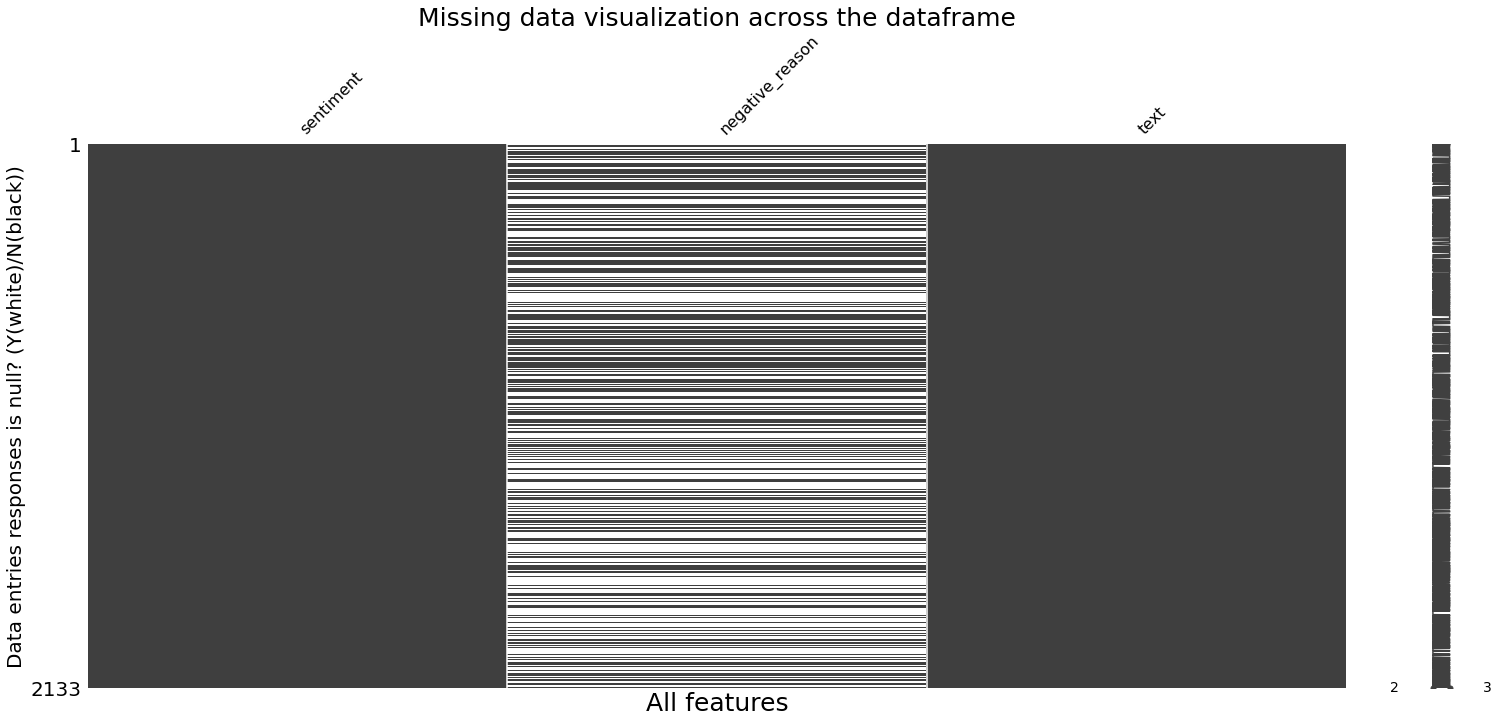

In [ ]:
ax = msno.matrix(df_canadian_elec)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

### Observation:
the verticle line on the extreme right shows the row-wise plot of the null values. As we can see, there are a a lot of null values. Hence exploring futher using .isnull() function in the dataframe

### Further Investigating the null values -

In [ ]:
## checking missing values in each features
missing_value_count_elec = df_canadian_elec.isna().sum().sort_values(ascending=False)
missing_value_count_elec #type = pandas series

negative_reason    1126
text                  0
sentiment             0
dtype: int64

In [ ]:
# checking the entries in the text column against the 1126 missing values - 

missing_text_list_elec = df_canadian_elec[df_canadian_elec['negative_reason'].isnull()].index.tolist()

df_canadian_elec.ix[missing_text_list_elec]['sentiment'].value_counts()

Positive    1126
Name: sentiment, dtype: int64

### Observation

As we can see, all the null values in the 'negative_reason' attribute is corresponding to the postive sentiment tweets as per 'sentiment' attribute. These null values checks out with context and the defination of the dataframe to have null in 'negative reason' for a positive tweet. Hence we can keep the data frame as it is.

## 1.2 Cleaning the tweets

the dataframe text need some cleaning as - Punctuation & special character removal Lower casing Stopwords /rarewords removal Spelling correction Lemmatization

## ------------------------------------ Sentiments.csv ------------------------------------

### Removing Twitter Handle References 

Dataframe has account references that start with @, eg @DonaldTrump or @FoxCon etc etc, hence we donot need them in the sentiment analysis of our tweets - hence removing those words

In [ ]:
#removing account names starting with @ using apply function on the data frame

#this line splits the sentence based on ' ' and then filters out the words starting with @

df['without_handle_names'] = df['text'].apply(lambda x: remove_twitter_handles(x))

### Removing the URLs from tweets

In [ ]:
df['without_url'] = df['without_handle_names'].apply(lambda x: remove_url(x))

### Converting HTML character codes to ASCII equivalent

In [ ]:
df['without_html'] = df['without_url'].apply(lambda x: convert_html_ascii(x))

### Lowecasing

In [ ]:
df['lowercased'] = df['without_html'].apply(lambda x: lowercase(x))

### Replacing strange terms in the tweets

In [ ]:
df['without_strange'] = df['lowercased'].apply(lambda x: strange_tweet(x))

### removing 'b' from the starting of every tweet -------------------------------------------------------
df['without_strange'] = df['without_strange'].apply(lambda x: x.lstrip('b"').lstrip("b'"))

### Removing punctuation

In [ ]:
### extracting vocabulary of all the punctuation used in text -------------------------------------------------------
## removing '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' punctuation

df['no_punctuation'] = df['without_strange'].apply(lambda x: remove_punctuation(x))

string.punctuation # output is string type

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Stop Words Removal

In [ ]:
df['without_stopwords'] = df['no_punctuation'].apply(lambda x: remove_stop_words_v2(x))

### Deleting all Non ASCII characters left in the dataframe eg. 'â€¦'

In [ ]:
df['without_ascii'] = df['without_stopwords'].apply(lambda x: delete_non_ascii(x))

### Tokenizing tweets

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')         

df['tokenized'] = df['without_ascii'].apply(lambda x: tokenizer.tokenize(x))

### Stemming and Lemmetization

For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

am, are, is **$\Rightarrow$** be

car, cars, car's, cars' $\Rightarrow$ car

The result of this mapping of text will be something like:

the boy's cars are different colors $\Rightarrow$

the boy car be differ color

However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

Source: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [ ]:
df['stemmed'] = df['tokenized'].apply(lambda x: stemming(x))

In [ ]:
df['lemmatized'] = df['tokenized'].apply(lambda x: lemmatizer(x))

### Detokenizing the cleaned tweet

converting the list of tokenized tweets back into strings

In [ ]:
df['cleaned_detokenized'] = df['lemmatized'].apply(lambda x: detokenize(x))

In [ ]:
df.head()

,sentiment,text,without_handle_names,without_url,without_html,lowercased,without_strange,no_punctuation,without_stopwords,without_ascii,tokenized,stemmed,lemmatized,cleaned_detokenized
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrock...,"RT They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not moderators...","RT They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not moderators...","RT They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not moderators...","rt they tried to take you out &amp; your poll numbers skyrocketed. voters matter, not moderators...","rt they tried to take you out &amp; your poll numbers skyrocketed. voters matter, not moderators...",rt they tried to take you out amp your poll numbers skyrocketed voters matter not moderators â€¦,poll numbers skyrocketed voters matter moderators â,poll numbers skyrocketed voters matter moderators,"[poll, numbers, skyrocketed, voters, matter, moderators]","[poll, number, skyrocket, voter, matter, moder]","[poll, number, skyrocketed, voter, matter, moderator]",poll number skyrocketed voter matter moderator
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.","Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.","Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.","Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.","damn i'm jealous, i wanna watch the fight i love ufc just no one knows.","damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",damn im jealous i wanna watch the fight i love ufc just no one knows,damn jealous wanna watch fight love ufc,damn jealous wanna watch fight love ufc,"[damn, jealous, wanna, watch, fight, love, ufc]","[damn, jealou, wanna, watch, fight, love, ufc]","[damn, jealous, wanna, watch, fight, love, ufc]",damn jealous wanna watch fight love ufc
2,Positive,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,I'm listening The Beatles now. They're great,i'm listening the beatles now. they're great,i'm listening the beatles now. they're great,im listening the beatles now theyre great,listening beatles great,listening beatles great,"[listening, beatles, great]","[listen, beatl, great]","[listening, beatles, great]",listening beatles great
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd","could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd","could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd","could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd","could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd","could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",could i please get a shout out or anything im a huge fan i cant wait for your new cd,shout huge fan cant wait cd,shout huge fan cant wait cd,"[shout, huge, fan, cant, wait, cd]","[shout, huge, fan, cant, wait, cd]","[shout, huge, fan, cant, wait, cd]",shout huge fan cant wait cd
4,Positive,@salspizza just spotted ur message there Tony and have replied,just spotted ur message there Tony and have replied,just spotted ur message there Tony and have replied,just spotted ur message there Tony and have replied,just spotted ur message there tony and have replied,just spotted ur message there tony and have replied,just spotted ur message there tony and have replied,spotted message tony replied,spotted message tony replied,"[spotted, message, tony, replied]","[spot, messag, toni, repli]","[spotted, message, tony, replied]",spotted message tony replied


### Observation:

the last column named 'cleaned_detokenized' has the final cleaned tweets

#### Creating copy of the original df so that the cleaned text is not disturbed later

In [ ]:
df_sentiments_1 = df[['sentiment','cleaned_detokenized']]

## ------------------------------------ Canadian Elections 2019 ------------------------------------

Performing similar cleaning for Canadian election tweets as explained in the cleaning section of Sentiments.csv

In [ ]:
df_canadian_elec['without_handle_names'] = df_canadian_elec['text'].apply(lambda x: remove_twitter_handles(x)) #removing twitter handles
df_canadian_elec['without_url'] = df_canadian_elec['without_handle_names'].apply(lambda x: remove_url(x)) # removing URL
df_canadian_elec['without_html'] = df_canadian_elec['without_url'].apply(lambda x: convert_html_ascii(x)) # Convert HTML to ascii
df_canadian_elec['lowercased'] = df_canadian_elec['without_html'].apply(lambda x: lowercase(x)) # lowercasing
df_canadian_elec['without_strange'] = df_canadian_elec['lowercased'].apply(lambda x: strange_tweet(x)) # removing strange tweets
df_canadian_elec['without_strange'] = df_canadian_elec['without_strange'].apply(lambda x: x.lstrip('b"').lstrip("b'"))
df_canadian_elec['no_punctuation'] = df_canadian_elec['without_strange'].apply(lambda x: remove_punctuation(x)) # removing punctuation
df_canadian_elec['without_stopwords'] = df_canadian_elec['no_punctuation'].apply(lambda x: remove_stop_words_v2(x)) # removing stop words
df_canadian_elec['without_ascii'] = df_canadian_elec['without_stopwords'].apply(lambda x: delete_non_ascii(x)) # deleting all non ASCII characters
df_canadian_elec['tokenized'] = df_canadian_elec['without_ascii'].apply(lambda x: tokenizer.tokenize(x)) # tokenizing the tweet
df_canadian_elec['lemmatized'] = df_canadian_elec['tokenized'].apply(lambda x: lemmatizer(x)) # lemmatizing the tweet

df_canadian_elec['cleaned_detokenized'] = df_canadian_elec['lemmatized'].apply(lambda x: detokenize(x)) # detokenzing the tweets

#### Creating copy of the original df so that the cleaned text is not disturbed later

In [ ]:
df_canadian_elec_1 = df_canadian_elec[['sentiment','negative_reason', 'cleaned_detokenized']]

# 2. DATA EXPLORATION ----------------------------------------------------------------------------

## ------------------------------------ Sentiments.csv ------------------------------------

### Checking for the distribution of data

Text(0, 0.5, 'Count of Response')

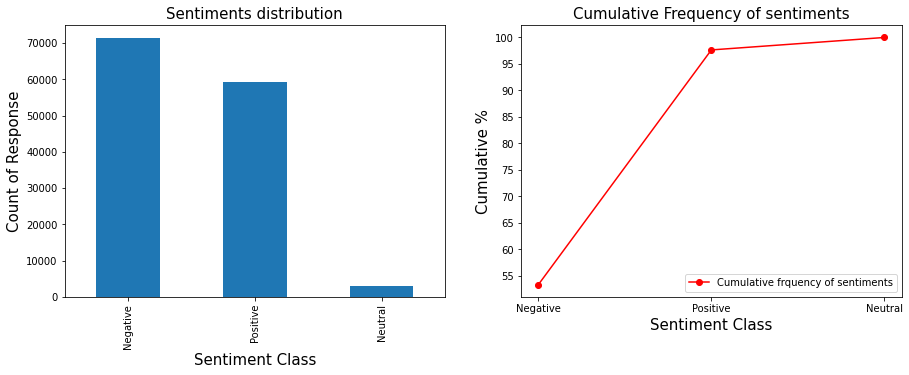

In [ ]:
plt.figure(figsize=(15,5))

total_entries = df_sentiments_1.shape[0]
frequency_percent = [i/total_entries*100 for i in df_sentiments_1['sentiment'].value_counts()]
cum_frequency_percent = np.cumsum(frequency_percent) #calculation of cumulative value

plt.subplot(1,2,2)
plt.yticks(np.arange(0,105,5), rotation='horizontal')
plt.plot(df_sentiments_1['sentiment'].value_counts().index.tolist(), cum_frequency_percent, 'r-o', 
         label='Cumulative frquency of sentiments')
plt.title("Cumulative Frequency of sentiments", fontsize = 15)
plt.xlabel('Sentiment Class', fontsize = 15)
plt.ylabel('Cumulative %', fontsize = 15)
plt.legend()

# exploring the profession of responders:

plt.subplot(1,2,1)
ax = df_sentiments_1['sentiment'].value_counts().plot(kind='bar')
ax.set_title('Sentiments distribution', fontsize = 15)
ax.set_xlabel("Sentiment Class", fontsize = 15)
ax.set_ylabel("Count of Response", fontsize = 15)

### Observation:

We can see that more than 95% of the data is of negative and positive sentiments in the sentiment.csv dataframe. Moreover, we need to train data only on negative and positive sentiments only inorder to predict the negative and positive sentiments of the canadian elections dataframe. Hence we will drop the neutral sentiments data from the dataframe of sentiments.csv

### Dropping Neutral Sentiments

In [ ]:
df_sentiments_1 = df_sentiments_1.drop(df_sentiments_1[df_sentiments_1['sentiment']=='Neutral'].index)
df_sentiments_1['sentiment'].value_counts()

Negative    71419
Positive    59236
Name: sentiment, dtype: int64

### Word Cloud Analysis of Sentiments

cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.

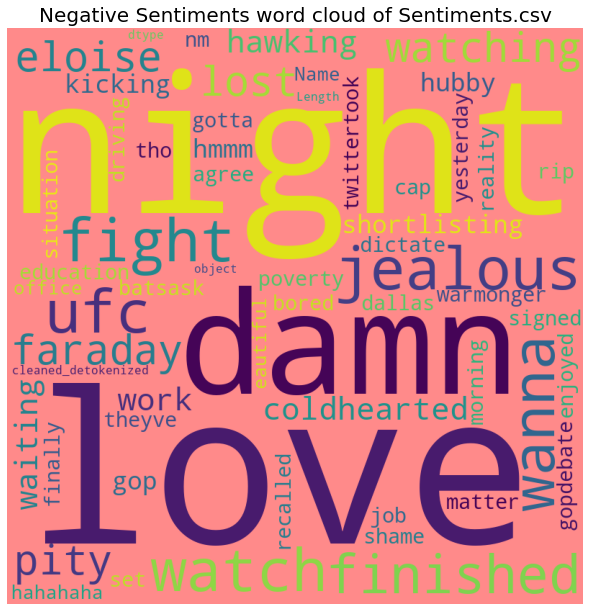

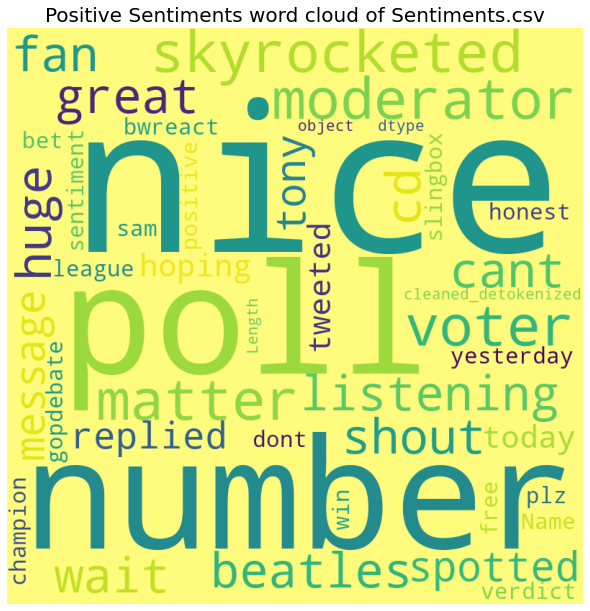

In [ ]:
## WordCloud for NEGATIVE tweets in Sentiments Dataset

wordcloud_sentiments_neg = WordCloud(width = 800, height = 800, background_color ='#ff8a8a', min_font_size = 4).generate(str(df_sentiments_1[df_sentiments_1['sentiment']=='Negative']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_sentiments_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Negative Sentiments word cloud of Sentiments.csv', fontsize = 20, y = 50)

## WordCloud for Positive tweets in Sentiments Dataset

wordcloud_sentiments_pos = WordCloud(width = 800, height = 800, background_color ='#fffb7d', min_font_size = 4).generate(str(df_sentiments_1[df_sentiments_1['sentiment']=='Positive']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_sentiments_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Positive Sentiments word cloud of Sentiments.csv', fontsize = 20, y = 50)

plt.show()

### Observation: 

- **Negative wordcloud** = It is evident that the words such as Night, Jealous, Watch, Love, Damn, Fight, UFC, Lost appear most of the times


- **Positive wordcloud** = It is evident that the words such as Voter, Moderator, Honest, Poll, Nice, Beatles appear most of the times

## ------------------------------------ Canadian Elections 2019 ------------------------------------

Text(0, 0.5, 'Sentiment Class')

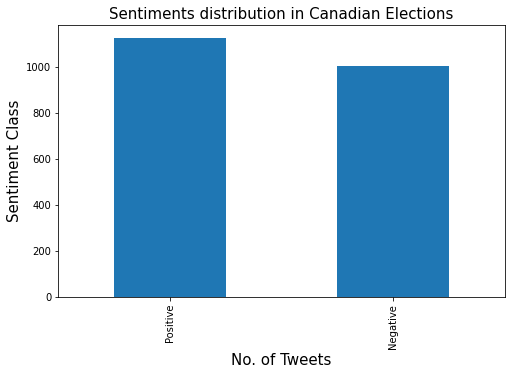

In [ ]:
plt.figure(figsize=(8,5))

ax = df_canadian_elec_1['sentiment'].value_counts().plot(kind='bar')
ax.set_title('Sentiments distribution in Canadian Elections', fontsize = 15)
ax.set_xlabel("No. of Tweets", fontsize = 15)
ax.set_ylabel("Sentiment Class", fontsize = 15)

### Observation

the distribution looks fairly distriuted among both positive and negative sentiment classes

### Classifying the political party with which the tweet is related too

key words used to classify = 

1. Liberal = ['trudeau', 'justin', 'justintrudeau', 'liberal', 'lpc']
2. Conservative = ['andrew', 'scheer', 'andrewscheer', 'scheerhypocrisy', 'conservative', 'cpc']
3. NDP = ['thejagmeetsingh', 'jagmeet', 'singh', 'democratic', 'ndp',]

In [ ]:
# defining key words

liberal = '|'.join(['trudeau', 'justin', 'justintrudeau', 'liberal', 'lpc'])
conservative = '|'.join(['andrew', 'scheer', 'andrewscheer', 'scheerhypocrisy', 'conservative', 'cpc'])
ndp = '|'.join(['thejagmeetsingh', 'jagmeet', 'singh', 'democratic', 'ndp',])

df_canadian_elec_1['political_party'] = '0' ## initiating an empty colum in the dataframe to be filled with political parties

### Now allocating tweets containing combination of the key words from all the parties as 'Mixed', other wise 'Libral' or 'Conservative' or 'NDP'. If the tweet doesnt contain any of the above letters, then it would be termed as 'None' 

In [ ]:
for i in range (df_canadian_elec_1.shape[0]):
    if ((pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0]) & (pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0])) | ((pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0]) & (pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0])) | ((pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0]) & (pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0])):
        df_canadian_elec_1['political_party'][i] = 'Mixed'
        
    elif pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0]:
        df_canadian_elec_1['political_party'][i] = 'Liberal'
        
    elif pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0]:
        df_canadian_elec_1['political_party'][i] = 'Conservative'
        
    elif pd.Series(df_canadian_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0]:
        df_canadian_elec_1['political_party'][i] = 'NDP'
        
    else:
        df_canadian_elec_1['political_party'][i] = 'None'

In [ ]:
df_canadian_elec_1

,sentiment,negative_reason,cleaned_detokenized,political_party
0,Negative,Women Reproductive right and Racism,rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect w...,Conservative
1,Positive,NaN,allwomanspacewalk realspacestation etobicokenorth cityofto onpoli cdnpoli elxn,None
2,Negative,Economy,brantford going cost billion year justin elxn cdnpoli canada,Liberal
3,Positive,NaN,canada canadaelection canadavotes elxn cant decide help,None
4,Negative,Economy,canada taxpayer sick tired hard earned donated corporate welfare bum dont reason trudeaumustgo l...,Liberal
...,...,...,...,...
2128,Negative,Scandal,good job smearing campaign cdnpoli elxn bernier file complaint election watchdog professional sm...,None
2129,Negative,Scandal,missed comment deflecting issue answer best response agent asked hired guess matter going bad wo...,None
2130,Positive,NaN,daily reminderthejagmeetsingh endorses strategic votingelxn elxn cdnpoli lpc ndp gpc,Mixed
2131,Negative,Women Reproductive right and Racism,yupnot going reopen abortion debateelxn scheerlies scheerhypocrisy,Conservative


### Exploration of Political spread of the tweets with respect to negative and positive tweets

In [ ]:
## exploring the age group of responders  with genders: using pivot tables

df_elec_p1 = df_canadian_elec_1[['sentiment', 'political_party']]
df_elec_p1['count'] = 1

## using pivot table to filter out desired columns

df_elec_p1 = pd.pivot_table(df_elec_p1, values = 'count', index = 'political_party',
                                  columns = 'sentiment', aggfunc=np.sum, fill_value=0)

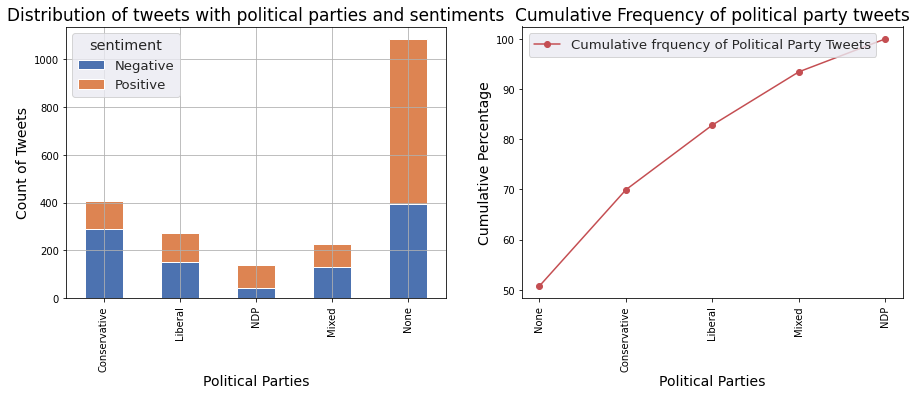

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.set(font_scale=1.2)
# plt.subplot(2,1,1)
ax = df_elec_p1.loc[['Conservative', 'Liberal', 'NDP', 'Mixed', 'None']].plot.bar(stacked=True, ax = ax1)
plt.xticks(rotation='vertical', fontsize="10")
ax.set_title("Distribution of tweets with political parties and sentiments", fontsize = 17)
ax.set_xlabel("Political Parties", fontsize = 14)
ax.set_ylabel("Count of Tweets", fontsize = 14)

total_entries1 = df_canadian_elec_1.shape[0]
frequency_percent1 = [i/total_entries1*100 for i in df_canadian_elec_1['political_party'].value_counts()]
cum_frequency_percent1 = np.cumsum(frequency_percent1) #calculation of cumulative value

plt.plot(df_canadian_elec_1['political_party'].value_counts().index.tolist(), cum_frequency_percent1, 'r-o', 
         label='Cumulative frquency of Political Party Tweets')
plt.xlabel('Political Parties', fontsize = 14)
plt.ylabel('Cumulative Percentage', fontsize = 14)
plt.xticks(rotation='vertical')
plt.title("Cumulative Frequency of political party tweets", fontsize = 17)
# plt.xticks(rotation='vertical')
plt.legend()

### Observation:

It is observed that the almost 50% of the tweets belong to neither of conservative or liberals or NDP. Also, the number of negative tweets for Conservatives and Liberals are significantly higher than their positive tweets. Moreover, for NDP the positive tweets are higher than their negative tweets

Also, most of the tweets are affiliated to the Conservative Party accorinding to this data

### Exploring the negative tweets political distribution

In [ ]:
df_elec_p2 = df_elec_p1.copy()
df_elec_p2['Total'] = df_elec_p2['Negative'] + df_elec_p2['Positive']
df_elec_p2

sentiment,Negative,Positive,Total
political_party,,,
Conservative,289,120,409
Liberal,153,122,275
Mixed,129,97,226
NDP,42,98,140
None,393,690,1083


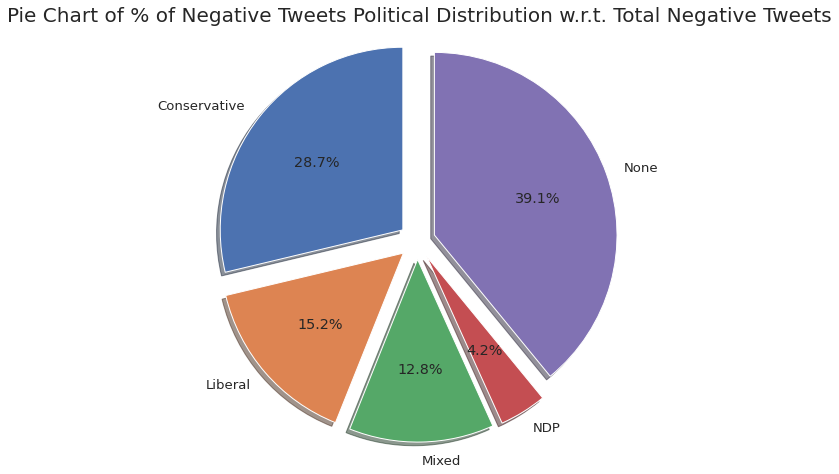

In [ ]:
labels = df_elec_p2.index.to_list()
sizes = [(x/df_elec_p2['Negative'].to_numpy().sum())*100 for x in df_elec_p2['Negative'].to_numpy()]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Chart of % of Negative Tweets Political Distribution w.r.t. Total Negative Tweets', fontsize = 20)

plt.show()

### Observation:

As we can see the negative tweets are most for the conservative party (28.7% of all the negative tweets) and NDP has the lowest number of negative tweets of all (4.2%)

### Exploring the positive to negative tweets ratio

In [ ]:
df_elec_p2['Ratio'] = df_elec_p2['Positive']/df_elec_p2['Negative']
df_elec_p2['political_party'] = df_elec_p2.index
df_elec_p2.iloc[:,0:-1]

sentiment,Negative,Positive,Total,Ratio
political_party,,,,
Conservative,289,120,409,0.415225
Liberal,153,122,275,0.797386
Mixed,129,97,226,0.751938
NDP,42,98,140,2.333333
None,393,690,1083,1.755725


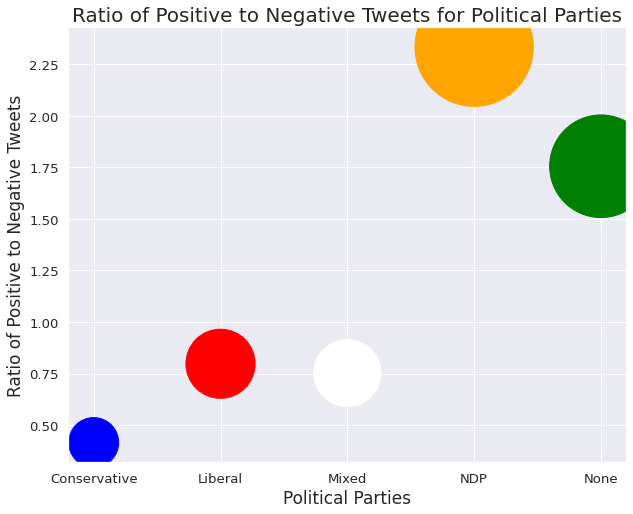

<Figure size 432x288 with 0 Axes>

In [ ]:
u, ind = np.unique(df_elec_p2.index.to_list(), return_inverse=True)

fig1, ax1 = plt.subplots(figsize = (10,8))
plt.scatter(ind, df_elec_p2['Ratio'], s = df_elec_p2['Ratio']*6000, color=['blue','red','white', 'orange', 'green'], 
            label = df_elec_p2['Ratio'].to_list())
plt.xticks(range(len(u)), u)
plt.title('Ratio of Positive to Negative Tweets for Political Parties', fontsize = 20)
plt.xlabel('Political Parties', fontsize = 17)
plt.ylabel('Ratio of Positive to Negative Tweets', fontsize = 17)
plt.show()
plt.tight_layout()

### Observation:

**NDP** has the **maximum positive to negative tweets ratio** (2.33 positive to negative tweets) and the **lowest ratio** is of **Conservatives** (0.415 positive to negative tweets)

### Word Cloud Analysis of Political Sentiments

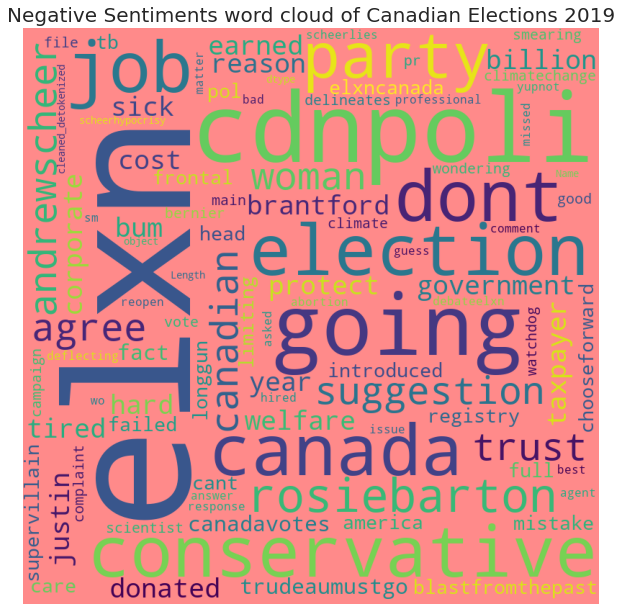

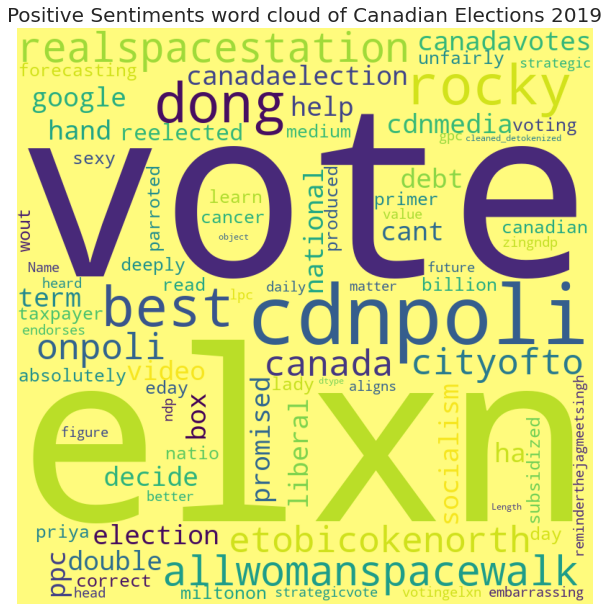

In [ ]:
## WordCloud for NEGATIVE tweets in Sentiments Dataset

wordcloud_elec_neg = WordCloud(width = 800, height = 800, background_color ='#ff8a8a', min_font_size = 4).generate(str(df_canadian_elec_1[df_canadian_elec_1['sentiment']=='Negative']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_elec_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Negative Sentiments word cloud of Canadian Elections 2019', fontsize = 20, y = 50)

## WordCloud for Positive tweets in Sentiments Dataset

wordcloud_elec_pos = WordCloud(width = 800, height = 800, background_color ='#fffb7d', min_font_size = 4).generate(str(df_canadian_elec_1[df_canadian_elec_1['sentiment']=='Positive']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_elec_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Positive Sentiments word cloud of Canadian Elections 2019', fontsize = 20, y = 50)

plt.show()

### Observation:

- **Negative Word Cloud of Elections** = It seems Justin Trudue (Liberal Party) and Andrew Scheer (Conservative Party) appear most in the negative cloud. Hence this could highlight that peoples hatred have been focused on the two major ruling parties in Canada i.e. Liberals and Conservatives


- **Positive Word Cloud of Elections** = Besides 'elxn' and 'vote' appearing in the positive word cloud, words like 'thejagmeetsingh' and 'ppc' also appears in twitter. This suggested that public has a positive outlook for NDP and PPC political parties.

# 3. MODEL PREPARATION ON SETIMENTS.CSV -------------------------------------------

## ------------------------------------ Sentiments.csv ------------------------------------

In [ ]:
sentiment_map = {'Positive':1, 'Negative':0} # encoding the positive and negative sentiments as 1 and 0

X_senti = df_sentiments_1['cleaned_detokenized']
y_senti = df_sentiments_1.replace({'sentiment': sentiment_map})['sentiment']

### Why the features are not rescaled ? -

The most accepted idea is that bag-of-words, Tf-Idf and other transformations should be left as is.

According to some: Standardization of categorical variables might be not natural. Neither is standarization of Tf-Idf because according to stats stack exchange:

(it's) (...) usually is a two-fold normalization.

First, each document is normalized to length 1, so there is no bias for longer or shorter documents. This equals taking the relative frequencies instead of the absolute term counts. This is "TF".

Second, IDF then is a cross-document normalization, that puts less weight on common terms, and more weight on rare terms, by normalizing (weighting) each word with the inverse in-corpus frequency.

Tf-Idf is meant to be used in its raw form in an algorithm. Other numerical values are the ones that could be normalized if the algorithm needs normalization or the data is just too small. Other options can be using algorithms resistant to different ranges and distributions like tree based models or simply using regularization, it's up to the cross-validation results really.

**But categorical features like bag-of-words, tf-idf or other nlp transformations should be left alone for better results.**

Source: https://datascience.stackexchange.com/questions/33730/should-i-rescale-tfidf-features

## Word Frequency Data Preparation (Bag of Words) or Term Frequency (TF)

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. For example, if you have 3 documents-

D1 - “I am feeling very happy today”

D2 - “I am not well today”

D3 - “I wish I could go to play”

First, it creates a vocabulary using unique words from all the documents -

Unique list of words -

I am feeling very happy today not well wish could go to play

Then, for each word the frequency of the word in the corresponding document is inserted

<img src="Pictures_MIE1624_Assi_2/bag_of_words.jpg" width="600"/>

In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text
# Also, we limit the words with max of 2000 features with maximum frequency to save computational time
count_vect_senti_wf = CountVectorizer(max_features=2000)

# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
X_senti_df = count_vect_senti_wf.fit_transform(X_senti)

X_senti_df_print = pd.DataFrame(np.round(X_senti_df.toarray(), 4), columns = count_vect_senti_wf.get_feature_names())
X_senti_df_print.head()

,abortion,absolutely,abt,access,accident,accidentally,account,ache,ack,acting,action,actual,ad,adam,add,addicted,address,admit,adorable,adult,advantage,advice,afford,afraid,afternoon,age,ago,agree,agreed,aha,ahead,ahh,ahhh,ahhhh,aim,aint,air,airport,aka,ala,...,worth,wow,write,writing,wrong,wrote,wtf,xbox,xd,xo,xoxo,xx,xxx,ya,yah,yall,yankee,yard,yay,ye,yea,yeah,year,yep,yes,yesterday,yo,york,youll,young,youtube,youve,yr,yuck,yum,yummy,yup,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_senti_df_print[X_senti_df_print['abt']!=0].head()

,abortion,absolutely,abt,access,accident,accidentally,account,ache,ack,acting,action,actual,ad,adam,add,addicted,address,admit,adorable,adult,advantage,advice,afford,afraid,afternoon,age,ago,agree,agreed,aha,ahead,ahh,ahhh,ahhhh,aim,aint,air,airport,aka,ala,...,worth,wow,write,writing,wrong,wrote,wtf,xbox,xd,xo,xoxo,xx,xxx,ya,yah,yall,yankee,yard,yay,ye,yea,yeah,year,yep,yes,yesterday,yo,york,youll,young,youtube,youve,yr,yuck,yum,yummy,yup,zombie,zone,zoo
799,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1873,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4323,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6779,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Inverse Document Frequency Data Preparation (TF-IDF)

While computing TF, all terms are considered equally important. However it is known that certain terms, such as “is”, “of”, and “that”, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing IDF, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.
IDF is the inverse of the document frequency which measures the informativeness of term t.

<img src="Pictures_MIE1624_Assi_2/tfidf.png" width="600"/>

Source: https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558

In [ ]:
## TF-IDF
## Choosing max no of features as 2000 to save computational time
tfidf_senti = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=2000) 
X_senti_tfidf = tfidf_senti.fit_transform(X_senti)

In [ ]:
X_senti_tfidf_print = pd.DataFrame(np.round(X_senti_tfidf.toarray(), 4), columns = tfidf_senti.get_feature_names())
X_senti_tfidf_print[X_senti_tfidf_print['abt']!=0].head()

,abortion,absolutely,abt,access,accident,accidentally,account,ache,ack,acting,action,actual,ad,adam,add,addicted,address,admit,adorable,adult,advantage,advice,afford,afraid,afternoon,age,ago,agree,agreed,aha,ahead,ahh,ahhh,ahhhh,aim,aint,air,airport,aka,ala,...,worth,wow,write,writing,wrong,wrote,wtf,xbox,xd,xo,xoxo,xx,xxx,ya,yah,yall,yankee,yard,yay,ye,yea,yeah,year,yep,yes,yesterday,yo,york,youll,young,youtube,youve,yr,yuck,yum,yummy,yup,zombie,zone,zoo
799,0.0000,0.0,16.6288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,0.0000,0.0,8.3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1873,0.0000,0.0,8.3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4323,0.0000,0.0,8.3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6779,8.0982,0.0,8.3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.1 Trying multiple classification algorithms with hyper parameter tuning and cross val.
#### (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost))

### Splitting the Data into training and testing

**Splitting the data into training and testing data** 30% testing and 70% training in all the functions of the classifiers

**Using stratify** This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

### 3.1.1 Logistic regression with hyp. param. tuning

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [ ]:
logreg_report_tf_senti, logreg_acc_tf_senti, logreg_confusion_tf_senti, logreg_f1_score_tf_senti, _,lr_bs_tf_senti, lr_bp_tf_senti = logistic_regression(X_senti_df, y_senti, test_size=0.3, param = {'C':[0.01,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
logreg_report_tfidf_senti, logreg_acc_tfidf_senti, logreg_confusion_tfidf_senti, logreg_f1_score_tfidf_senti, _, lr_bs_tfidf_senti,lr_bp_tfidf_senti = logistic_regression(X_senti_tfidf, y_senti, test_size=0.3, param = {'C':[0.01,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
print('\n ---------------------- Term Frequency Log. Regression Model ----------------------\n')
print(logreg_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',logreg_confusion_tf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)

print('\n ---------------------- TF-IDF Log. Regression Model ----------------------\n')
print(logreg_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',logreg_confusion_tfidf_senti)
print('\n Best Tuning Score is =', lr_bs_tfidf_senti)
print('\n Best Parameters are =', lr_bp_tfidf_senti)


 ---------------------- Term Frequency Log. Regression Model ----------------------

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     21426
           1       0.69      0.74      0.71     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.74      0.73      0.73     39197

Accuracy =  73.368%
F1 Score =  73.416% 

Confusion Matrix --------
 [[15670  5756]
 [ 4683 13088]]

 Best Tuning Score is = 0.7298760086597126

 Best Parameters are = {'C': 0.5, 'solver': 'saga'}

 ---------------------- TF-IDF Log. Regression Model ----------------------

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     21426
           1       0.70      0.73      0.71     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.73      0.73      0

### 3.1.2 KNN with hyp. param. tuning

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [ ]:
knn_report_tf_senti, knn_acc_tf_senti, knn_confusion_tf_senti, knn_f1_score_tf_senti, _, knn_bs_tf_senti, knn_bp_tf_senti = knn(X_senti_df, y_senti, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3)
knn_report_tfidf_senti, knn_acc_tfidf_senti, knn_confusion_tfidf_senti, knn_f1_score_tfidf_senti, _, knn_bs_tfidf_senti, knn_bp_tfidf_senti = knn(X_senti_tfidf, y_senti, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency KNN Model ----------------------\n')
print(knn_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(knn_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(knn_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',knn_confusion_tf_senti)
print('\n Best Tuning Score is =', knn_bs_tf_senti)
print('\n Best Parameters are =', knn_bp_tf_senti)


print('\n ---------------------- TF-IDF KNN Model ----------------------\n')
print(knn_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(knn_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(knn_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',knn_confusion_tfidf_senti)
print('\n Best Tuning Score is =', knn_bs_tfidf_senti)
print('\n Best Parameters are =', knn_bp_tfidf_senti)



 ---------------------- Term Frequency KNN Model ----------------------

              precision    recall  f1-score   support

           0       0.68      0.75      0.71     21426
           1       0.66      0.57      0.61     17771

    accuracy                           0.67     39197
   macro avg       0.67      0.66      0.66     39197
weighted avg       0.67      0.67      0.67     39197

Accuracy =  66.936%
F1 Score =  66.616% 

Confusion Matrix --------
 [[16145  5281]
 [ 7679 10092]]

 Best Tuning Score is = 0.6693126899779134

 Best Parameters are = {'n_neighbors': 8}

 ---------------------- TF-IDF KNN Model ----------------------

              precision    recall  f1-score   support

           0       0.67      0.76      0.71     21426
           1       0.66      0.55      0.60     17771

    accuracy                           0.67     39197
   macro avg       0.66      0.66      0.66     39197
weighted avg       0.66      0.67      0.66     39197

Accuracy =  66.543%

### 3.1.3 Naive Bayes (Multinomial)

naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. 
Models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [ ]:
naive_bayes_multi_report_tf_senti, naive_bayes_multi_acc_tf_senti, naive_bayes_multi_confusion_tf_senti, naive_bayes_multi_f1_score_tf_senti, _ = naive_bayes_multinomial(X_senti_df, y_senti, alpha=1, test_size=0.3)

In [ ]:
naive_bayes_multi_report_tfidf_senti, naive_bayes_multi_acc_tfidf_senti, naive_bayes_multi_confusion_tfidf_senti, naive_bayes_multi_f1_score_tfidf_senti, _ = naive_bayes_multinomial(X_senti_tfidf, y_senti, alpha=1, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Naive Bayes (Multinomial) Model ----------------------\n')
print(naive_bayes_multi_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(naive_bayes_multi_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(naive_bayes_multi_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',naive_bayes_multi_confusion_tf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)


print('\n ---------------------- TF-IDF Naive Bayes (Multinomial) Model ----------------------\n')
print(naive_bayes_multi_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(naive_bayes_multi_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(naive_bayes_multi_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',naive_bayes_multi_confusion_tfidf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)



 ---------------------- Term Frequency Naive Bayes (Multinomial) Model ----------------------

              precision    recall  f1-score   support

           0       0.73      0.76      0.75     21426
           1       0.70      0.66      0.68     17771

    accuracy                           0.72     39197
   macro avg       0.71      0.71      0.71     39197
weighted avg       0.72      0.72      0.72     39197

Accuracy =  71.643%
F1 Score =  71.567% 

Confusion Matrix --------
 [[16315  5111]
 [ 6004 11767]]

 Best Tuning Score is = 0.7298760086597126

 Best Parameters are = {'C': 0.5, 'solver': 'saga'}

 ---------------------- TF-IDF Naive Bayes (Multinomial) Model ----------------------

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     21426
           1       0.67      0.70      0.69     17771

    accuracy                           0.71     39197
   macro avg       0.71      0.71      0.71     39197
weighted avg       0

### 3.1.4 SVM (Linear SVC) with hyp. param. tuning

LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained. They are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [ ]:
linear_svc_report_tf_senti, linear_svc_acc_tf_senti, linear_svc_confusion_tf_senti, linear_svc_f1_score_tf_senti, _, linear_svc_bs_tf_senti, linear_svc_bp_tf_senti = linear_svc(X_senti_df, y_senti, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
linear_svc_report_tfidf_senti, linear_svc_acc_tfidf_senti, linear_svc_confusion_tfidf_senti, linear_svc_f1_score_tfidf_senti, _, linear_svc_bs_tfidf_senti, linear_svc_bp_tfidf_senti = linear_svc(X_senti_tfidf, y_senti, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency SVM (Linear SVC) Model ----------------------\n')
print(linear_svc_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_tf_senti)
print('\n Best Tuning Score is =', linear_svc_bs_tf_senti)
print('\n Best Parameters are =', linear_svc_bp_tf_senti)


print('\n ---------------------- TF-IDF SVM (Linear SVC) Model ----------------------\n')
print(linear_svc_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_tfidf_senti)
print('\n Best Tuning Score is =', linear_svc_bs_tfidf_senti)
print('\n Best Parameters are =', linear_svc_bp_tfidf_senti)



 ---------------------- Term Frequency SVM (Linear SVC) Model ----------------------

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     21426
           1       0.69      0.74      0.72     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.74      0.73      0.73     39197

Accuracy =  73.363%
F1 Score =  73.416% 

Confusion Matrix --------
 [[15547  5879]
 [ 4562 13209]]

 Best Tuning Score is = 0.7289466203065889

 Best Parameters are = {'C': 0.1}

 ---------------------- TF-IDF SVM (Linear SVC) Model ----------------------

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     21426
           1       0.69      0.74      0.72     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.74      0.73      0.73     39197

A

### 3.1.5 Decision Trees with hyp. param. tuning

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [ ]:
decision_trees_report_tf_senti, decision_trees_acc_tf_senti, decision_trees_confusion_tf_senti, decision_trees_f1_score_tf_senti, _, decision_trees_bs_tf_senti, decision_trees_bp_tf_senti = decision_trees(X_senti_df, y_senti, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
decision_trees_report_tfidf_senti, decision_trees_acc_tfidf_senti, decision_trees_confusion_tfidf_senti, decision_trees_f1_score_tfidf_senti, _, decision_trees_bs_tfidf_senti, decision_trees_bp_tfidf_senti = decision_trees(X_senti_tfidf, y_senti, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Decision Tree Model ----------------------\n')
print(decision_trees_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_tf_senti)
print('\n Best Tuning Score is =', decision_trees_bs_tf_senti)
print('\n Best Parameters are =', decision_trees_bp_tf_senti)


print('\n ---------------------- TF-IDF Decision Tree Model ----------------------\n')
print(decision_trees_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_tfidf_senti)
print('\n Best Tuning Score is =', decision_trees_bs_tfidf_senti)
print('\n Best Parameters are =', decision_trees_bp_tfidf_senti)



 ---------------------- Term Frequency Decision Tree Model ----------------------

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     21426
           1       0.65      0.65      0.65     17771

    accuracy                           0.68     39197
   macro avg       0.68      0.68      0.68     39197
weighted avg       0.68      0.68      0.68     39197

Accuracy =  68.100%
F1 Score =  68.102% 

Confusion Matrix --------
 [[15155  6271]
 [ 6233 11538]]

 Best Tuning Score is = 0.6779286667104026

 Best Parameters are = {'criterion': 'entropy'}

 ---------------------- TF-IDF Decision Tree Model ----------------------

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     21426
           1       0.65      0.65      0.65     17771

    accuracy                           0.68     39197
   macro avg       0.68      0.68      0.68     39197
weighted avg       0.68      0.68      0.68     

### 3.1.6 Random Forests with hyp. param. tuning

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [ ]:
random_forest_report_tf_senti, random_forest_acc_tf_senti, random_forest_confusion_tf_senti, random_forest_f1_score_tf_senti, _, random_forest_bs_tf_senti, random_forest_bp_tf_senti = random_forest(X_senti_df, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 2, test_size=0.3)

In [ ]:
random_forest_report_tfidf_senti, random_forest_acc_tfidf_senti, random_forest_confusion_tfidf_senti, random_forest_f1_score_tfidf_senti, _, random_forest_bs_tfidf_senti, random_forest_bp_tfidf_senti = random_forest(X_senti_tfidf, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 2, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Random Forests Model ----------------------\n')
print(random_forest_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_tf_senti)
print('\n Best Tuning Score is =', random_forest_bs_tf_senti)
print('\n Best Parameters are =', random_forest_bp_tf_senti)


print('\n ---------------------- TF-IDF Random Forests Model ----------------------\n')
print(random_forest_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_tfidf_senti)
print('\n Best Tuning Score is =', random_forest_bs_tfidf_senti)
print('\n Best Parameters are =', random_forest_bp_tfidf_senti)



 ---------------------- Term Frequency Random Forests Model ----------------------

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     21426
           1       0.68      0.71      0.69     17771

    accuracy                           0.71     39197
   macro avg       0.71      0.71      0.71     39197
weighted avg       0.72      0.71      0.72     39197

Accuracy =  71.467%
F1 Score =  71.508% 

Confusion Matrix --------
 [[15462  5964]
 [ 5220 12551]]

 Best Tuning Score is = 0.7099980318834875

 Best Parameters are = {'criterion': 'entropy', 'n_estimators': 100}

 ---------------------- TF-IDF Random Forests Model ----------------------

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     21426
           1       0.68      0.71      0.69     17771

    accuracy                           0.71     39197
   macro avg       0.71      0.71      0.71     39197
weighted avg       0.72  

### 3.1.7 XG Boost with hyp. param. tuning
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

Source: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [ ]:
xgboost_model_report_tf_senti, xgboost_model_acc_tf_senti, xgboost_model_confusion_tf_senti, xgboost_model_f1_score_tf_senti, _, xgboost_model_bs_tf_senti, xgboost_model_bp_tf_senti = xgboost(X_senti_df, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

In [ ]:
xgboost_model_report_tfidf_senti, xgboost_model_acc_tfidf_senti, xgboost_model_confusion_tfidf_senti, xgboost_model_f1_score_tfidf_senti, _, xgboost_model_bs_tfidf_senti, xgboost_model_bp_tfidf_senti = xgboost(X_senti_tfidf, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency XG Boost Model ----------------------\n')
print(xgboost_model_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_tf_senti)
print('\n Best Tuning Score is =', xgboost_model_bs_tf_senti)
print('\n Best Parameters are =', xgboost_model_bp_tf_senti)


print('\n ---------------------- TF-IDF XG Boost Model ----------------------\n')
print(xgboost_model_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_tfidf_senti)
print('\n Best Tuning Score is =', xgboost_model_bs_tfidf_senti)
print('\n Best Parameters are =', xgboost_model_bp_tfidf_senti)



 ---------------------- Term Frequency XG Boost Model ----------------------

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     21426
           1       0.67      0.77      0.72     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.73      0.73      0.73     39197

Accuracy =  72.699%
F1 Score =  72.748% 

Confusion Matrix --------
 [[14776  6650]
 [ 4051 13720]]

 Best Tuning Score is = 0.7228235911565966

 Best Parameters are = {'learning_rate': 1}

 ---------------------- TF-IDF XG Boost Model ----------------------

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     21426
           1       0.67      0.77      0.72     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.73      0.73     39197
weighted avg       0.73      0.73      0.73     39197

Accurac

## 3.2 Analysing the accuracy results of all the tuned models

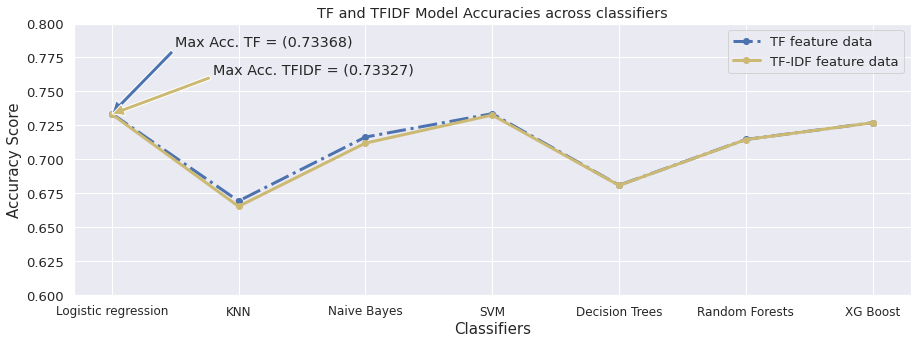

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

tf_acc_scores = [logreg_acc_tf_senti, knn_acc_tf_senti, naive_bayes_multi_acc_tf_senti, linear_svc_acc_tf_senti, 
                 decision_trees_acc_tf_senti, random_forest_acc_tf_senti, xgboost_model_acc_tf_senti]

tfidf_acc_scores = [logreg_acc_tfidf_senti, knn_acc_tfidf_senti, naive_bayes_multi_acc_tfidf_senti, linear_svc_acc_tfidf_senti, 
                    decision_trees_acc_tfidf_senti, random_forest_acc_tfidf_senti, xgboost_model_acc_tfidf_senti]

classifiers_list = ['Logistic regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Trees', 'Random Forests', 'XG Boost'] 

plt.subplot(1,1,1)
plt.plot(classifiers_list, tf_acc_scores, marker='o', color='b', linestyle='-.', linewidth=3, label = 'TF feature data')
plt.plot(classifiers_list, tfidf_acc_scores, marker='o', color='y', linewidth=3, label = 'TF-IDF feature data')
plt.xticks(np.arange(0,7,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
plt.ylim([0.6,0.8])
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('TF and TFIDF Model Accuracies across classifiers')

ymax = max(np.asarray(tf_acc_scores, dtype=np.float32))
xmax = np.where(tf_acc_scores == np.amax(np.asarray(tf_acc_scores)))[0]
plt.annotate('Max Acc. TF = (%.5f)'%(np.amax(np.asarray(tf_acc_scores))), xy=(xmax, ymax), xytext=(xmax+0.5, ymax+0.05), 
                arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))

ymax = max(np.asarray(tfidf_acc_scores, dtype=np.float32))
xmax = np.where(tfidf_acc_scores == np.amax(np.asarray(tfidf_acc_scores)))[0]
plt.annotate('Max Acc. TFIDF = (%.5f)'%(np.amax(np.asarray(tfidf_acc_scores))), xy=(xmax, ymax), xytext=(xmax+0.8, ymax+0.03), 
                arrowprops=dict(facecolor='y', shrink = 0.005, frac=0.1))

plt.legend()
plt.show()

### Observation:

- **TF** = Best Accuracy score was of **Logistic Regression** with accuracy of **73.368%**
- **TFIDF** = Best Accuracy score was of **Logistic Regression** with accuracy of **73.327%**

Since the of all, Logistic Regression with TF performed marginally better, Hence we **will go ahead with Logistic Regression and use TF for the election dataset**

### Logistic Regression Model is Chosen with Bag of Words (TF)

In [ ]:
print('Best Tuning Score is =', lr_bs_tf_senti)
print('Best Parameters are =', lr_bp_tf_senti)
print('Model Accuracy for logistic regression is =', "{0:.3%}".format(logreg_acc_tf_senti))

Best Tuning Score is = 0.7298760086597126
Best Parameters are = {'C': 0.5, 'solver': 'saga'}
Model Accuracy for logistic regression is = 73.368%


### Achivied Tuned Accuracy Sentiments.csv = 73.368%

with Term Frequency Log. Regression Model ON **Sentiments TEST SET**

# 4. MODEL IMPLIMENTATION ON ELECTIONS ----------------------------------------------

## ------------------------------------ Canadian Elections 2019 ------------------------------------

## 4.1 TF on Election Dataset

In [ ]:
## Mapping positive and negative to 1 and 0 in the elections dataset

X_elec = df_canadian_elec_1['cleaned_detokenized']
y_elec = df_canadian_elec_1.replace({'sentiment': sentiment_map})['sentiment']

In [ ]:
## TF
## Choosing max no of features as 2000 to save computational time
tf_elec = CountVectorizer(max_features=2000)
X_elec_tf = tf_elec.fit_transform(X_elec)

# to print the dataframe
X_elec_tf_print = pd.DataFrame(np.round(X_elec_tf.toarray(), 4), columns = tf_elec.get_feature_names())
X_elec_tf_print.head()

,ab,abc,ability,ableg,abortion,abpoli,absolute,absolutely,abuse,accept,accepted,access,accessible,account,accountable,acoyne,action,activist,activity,actual,ad,adam,adamlockett,add,addition,address,addressing,adequate,admitted,adult,advance,advanced,advantage,advertising,advice,advised,advisor,advocate,affair,affect,...,xexx,xexxa,xexxcendorsementxexxd,xexxci,xexxcthe,xexxcwe,xfxfxax,xfxfxaxa,xfxfxaxbxexxdxexxxefxbxf,xfxfxdx,xfxfxx,xfxfxxa,xfxfxxb,xfxfxxbaxfxfxxb,xfxfxxc,xfxfxxd,xfxfxxelxn,xfxfxxf,xfxfxxfxfxfxxfxfxfxxf,ya,yall,yankeedoodleandy,yeah,year,yeg,yell,yesterday,ygk,yikes,york,youll,young,younger,youth,youve,yqr,yr,yup,yyc,yyj
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4.2 General tweet Model Implimention and testing on Election Dataset 

Using the Logistic Regression Model already trained for general tweets in Section 3.3.3 (3.3.3 Testing of General tweet Tuned Model on Sentiments.csv for accuracy) 

In [ ]:
logreg_model_tuned_sentiments = LogisticRegression(random_state=1624, solver = lr_bp_tf_senti['solver'], C=lr_bp_tf_senti['C']).fit(X_senti_df, y_senti)
logreg_model_tuned_elections_pred = logreg_model_tuned_sentiments.predict(X_elec_tf)
logreg_tuned_elections_report = classification_report(y_elec,logreg_model_tuned_elections_pred)
logreg_tuned_elections_acc = accuracy_score(y_elec, logreg_model_tuned_elections_pred)
logreg_tuned_elections_confusion = confusion_matrix(y_elec, logreg_model_tuned_elections_pred)
logreg_tuned_elections_f1_score = f1_score(y_elec, logreg_model_tuned_elections_pred)

In [ ]:
print('\n ---------------------- Term Frequency General Tweet Log. Regression Model ON Election SET ----------------------\n')
print(logreg_tuned_elections_report)
print('Accuracy = ', "{0:.3%}".format(logreg_tuned_elections_acc))
print('F1 Score = ', "{0:.3%}".format(logreg_tuned_elections_f1_score), '\n')
print('Confusion Matrix --------\n',logreg_tuned_elections_confusion)


 ---------------------- Term Frequency General Tweet Log. Regression Model ON Election SET ----------------------

              precision    recall  f1-score   support

           0       0.48      0.82      0.61      1006
           1       0.58      0.22      0.32      1127

    accuracy                           0.50      2133
   macro avg       0.53      0.52      0.47      2133
weighted avg       0.53      0.50      0.46      2133

Accuracy =  50.352%
F1 Score =  32.246% 

Confusion Matrix --------
 [[822 184]
 [875 252]]


## Achivied Tuned Accuracy Sentiments.csv = 50.352%

with Term Frequency Log. Regression Model ON **Election Set**

## 4.3 Prediction Results Exploration

In [ ]:
## Making a Dataframe of correct and false prediction on elections data set

df_canadian_elec_2 = df_canadian_elec_1.copy()
df_canadian_elec_2['sentiment_predictions'] = pd.Series(logreg_model_tuned_elections_pred).map({0:'Negative',1:'Positive'})

df_canadian_elec_2['sentiment_vs_pred'] = 0

for i in range (df_canadian_elec_2.shape[0]):
    if df_canadian_elec_2['sentiment'][i] == df_canadian_elec_2['sentiment_predictions'][i]:
        df_canadian_elec_2['sentiment_vs_pred'][i] = 'Correct_Prediction'
    else:
        df_canadian_elec_2['sentiment_vs_pred'][i] = 'Wrong_Prediction'


In [ ]:
df_canadian_elec_2.head()

,sentiment,negative_reason,cleaned_detokenized,political_party,sentiment_predictions,sentiment_vs_pred
0,Negative,Women Reproductive right and Racism,rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect w...,Conservative,Negative,Correct_Prediction
1,Positive,NaN,allwomanspacewalk realspacestation etobicokenorth cityofto onpoli cdnpoli elxn,None,Negative,Wrong_Prediction
2,Negative,Economy,brantford going cost billion year justin elxn cdnpoli canada,Liberal,Negative,Correct_Prediction
3,Positive,NaN,canada canadaelection canadavotes elxn cant decide help,None,Negative,Wrong_Prediction
4,Negative,Economy,canada taxpayer sick tired hard earned donated corporate welfare bum dont reason trudeaumustgo l...,Liberal,Negative,Correct_Prediction


### Exploring the Model Predictions vs actual sentiments on election dataset

Text(0, 0.5, 'Count of Predictions')

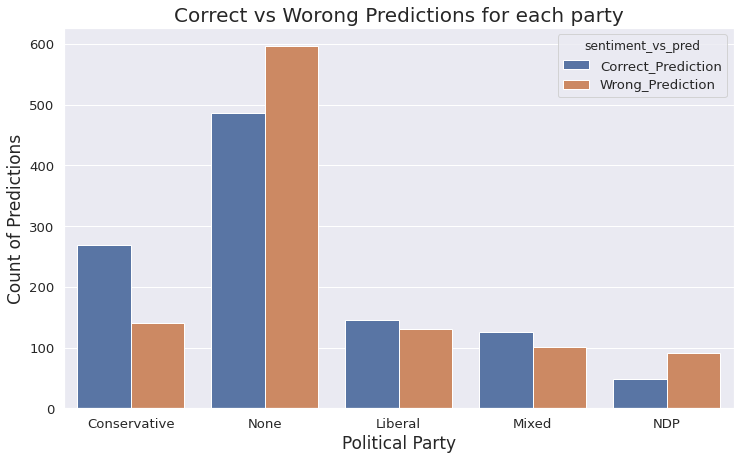

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=df_canadian_elec_2, hue='sentiment_vs_pred')
ax.set_title('Correct vs Worong Predictions for each party', fontsize = 20)
ax.set_xlabel('Political Party', fontsize = 17)
ax.set_ylabel('Count of Predictions', fontsize = 17)


### Exploring the predicted sentiments

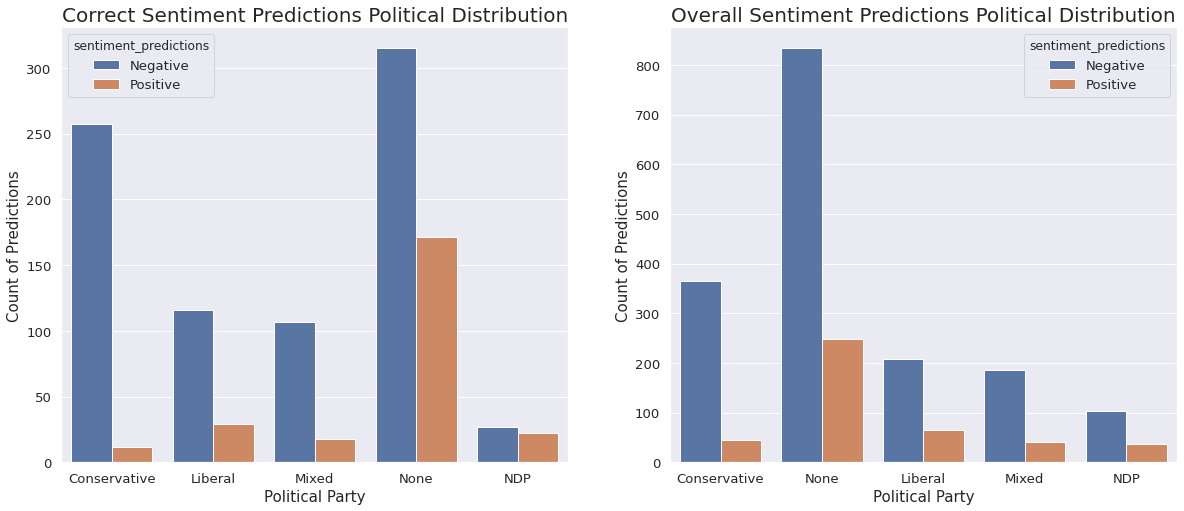


---------------------------------- Model Result ----------------------------------


Total Correct Predictions are = 1074
Total Incorrect Predictions are = 1059
Accuracy =  50.352%


<Figure size 432x288 with 0 Axes>

In [ ]:
# fig, axs = plt.subplots(1,2, figsize=(15,5))
# sns.set(font_scale=1.2)
plt.figure(figsize=(20,4*2))
gs = gridspec.GridSpec(1,2)

plt.subplot(gs[0])
ax1 = sns.countplot(x="political_party", data=df_canadian_elec_2[df_canadian_elec_2['sentiment_vs_pred'] == 'Correct_Prediction'], hue='sentiment_predictions')
ax1.set_title('Correct Sentiment Predictions Political Distribution', fontsize = 20)
ax1.set_xlabel('Political Party', fontsize = 15)
ax1.set_ylabel('Count of Predictions', fontsize = 15)
# ax1.set_ylim(0,900)

plt.subplot(gs[1])
ax2 = sns.countplot(x="political_party", data=df_canadian_elec_2, hue='sentiment_predictions')
ax2.set_title('Overall Sentiment Predictions Political Distribution', fontsize = 20)
ax2.set_xlabel('Political Party', fontsize = 15)
ax2.set_ylabel('Count of Predictions', fontsize = 15)
# ax2.set_ylim(0,900)

plt.show()
plt.tight_layout()

display(Markdown('\n---------------------------------- Model Result ----------------------------------\n'))
print('Total Correct Predictions are =', logreg_tuned_elections_confusion[0][0]+logreg_tuned_elections_confusion[1][1])
print('Total Incorrect Predictions are =', logreg_tuned_elections_confusion[0][1]+logreg_tuned_elections_confusion[1][0])
print('Accuracy = ', "{0:.3%}".format(logreg_tuned_elections_acc))

## Observation:

It is evident from the graphs that all three political parties have quite a lot negative sentiments expressed in tweets. 

However for the **Conservative party**, both the correct and overall predictions indicate the negative tweets are **5 times** the positive tweet (lowest predicted positive to negative tweet ratio of all). This means that the conservative party has a lot of negative sentiment compared to positive sentiment.

Moreover, the **Liberal Party**, although having many predicted negative sentiments, has a better predicted positive to predicted negative tweets ratio as compared to Conservative Party. Moreover, Liberal Party has the maximum number of predicted positive tweets amongst all three political parties.

Additionally, **NDP** has the best (predicted) positive to negative tweets ratio amongst all 3 political parties. However, the overall tweets of NDP itself is very low in the dataset to produce any measurable impact on the precitions of election winner.

#### MODEL PREDICTED RESULT: 

The **Liberal Party** should win according to the predicted model as discussed in the section above.

#### ACTUAL ELECTION RESULT:

The **Liberal Party** won the elections.

## Conclusion:

This shows that tweet **NLP analytics can be a very usefull tool** to help us predict that the outcome of the elections. The tweets represent the general opinion about the political parties, and performing tweet NLP can help the political parties to assess the public opinion and make reforms accordingly.

# 5. MODEL IMPLIMENTATION ON ELECTIONS TO CLASSIFY 'NEGATIVE REASON' OF ELECTION TWEETS ----------------------------------------------

In [ ]:
df_canadian_elec_all_negative = df_canadian_elec_2[df_canadian_elec_2['sentiment']=='Negative'][['negative_reason', 'cleaned_detokenized']]

In [ ]:
df_canadian_elec_all_negative.head()

,negative_reason,cleaned_detokenized
0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect w...
2,Economy,brantford going cost billion year justin elxn cdnpoli canada
4,Economy,canada taxpayer sick tired hard earned donated corporate welfare bum dont reason trudeaumustgo l...
5,Others,canadavotes elxn cdnpoli fact blastfromthepast conservative introduced longgun registry head pol...
8,Others,chooseforward cdnpoli elxncanada dont america mistake full frontal tb


## 5.1 Exploring the negative reasons

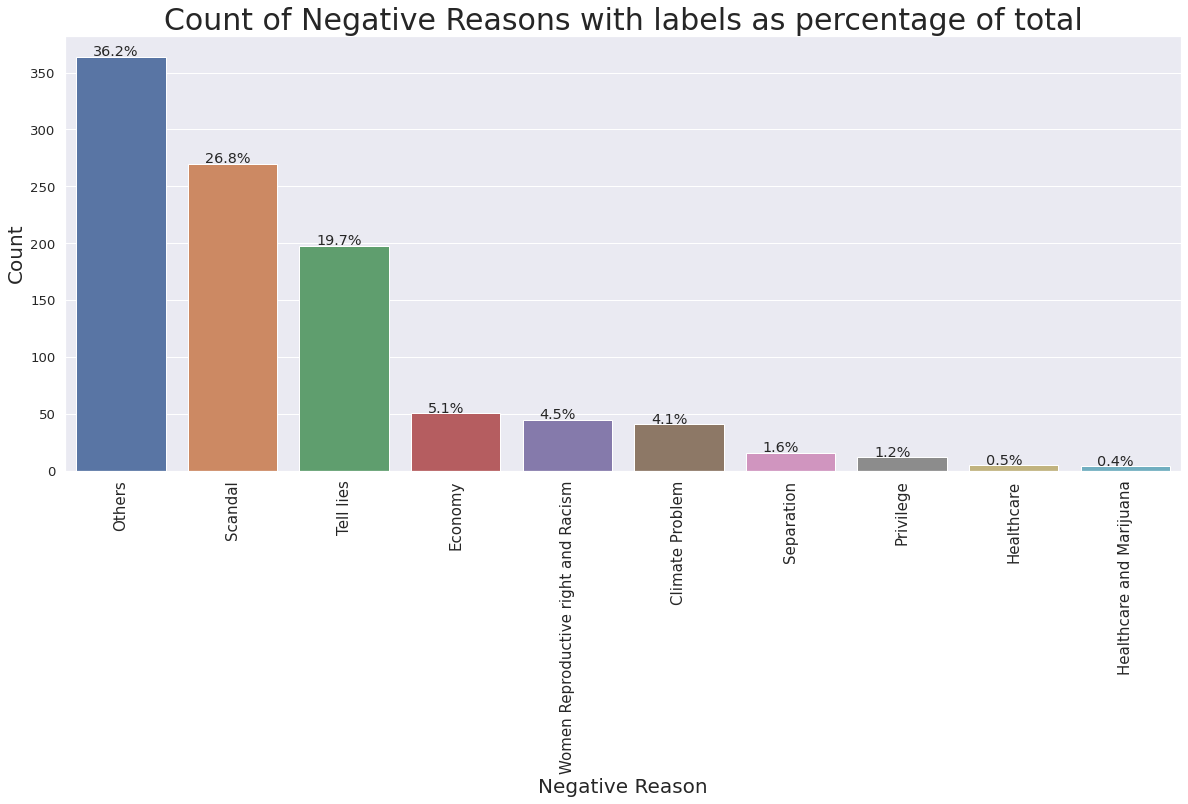

In [ ]:
plt.figure(figsize=(20,8))
# df_canadian_elec_all_negative['negative_reason'].value_counts()

ax3 = sns.countplot(x="negative_reason", data=df_canadian_elec_all_negative, order = df_canadian_elec_all_negative['negative_reason'].value_counts().index)
plt.xticks(rotation='vertical', fontsize="15")
ax3.set_xlabel('Negative Reason', fontsize = '20')
ax3.set_ylabel('Count', fontsize = '20')
ax3.set_title('Count of Negative Reasons with labels as percentage of total',  fontsize = '30')

for p, label in zip(ax3.patches, np.round(np.true_divide(df_canadian_elec_all_negative['negative_reason'].value_counts().values, df_canadian_elec_all_negative['negative_reason'].value_counts().sum()),3)):
    ax3.annotate("{0:.1%}".format(label), (p.get_x()+0.15, p.get_height()+0.4))

### Observation:

It can be observed from the table above that the data is skewed for the last 5 categories which represent a very low percentage of the total (approx 7.8%). Hence we can combine a few categories

Categories = 

- 1. Scandal
- 2. Exploitation = 'Tell Lies' + 'Separation' + 'Priviledge' - **Reason being** : They all form a part of manipultion by leaders  
- 3. Economy
- 4. Healthcare = 'Women Reproductive right and Racism' + 'Healthcare' + 'Healthcare and Marijuana' - **Reason being** : They all relate to healthcare and wellness of the public
- 5. Climate Problem
- 6. Others

## 5.2 Combining negative reason Categories:

In [ ]:
df_canadian_elec_allneg_combined = df_canadian_elec_all_negative.copy()

df_canadian_elec_allneg_combined['combined_reason'] = df_canadian_elec_allneg_combined['negative_reason'].map({'Scandal':'Scandal',
                                                                                                               'Tell lies':'Exploitation',
                                                                                                               'Privilege':'Exploitation',
                                                                                                               'Separation':'Exploitation',
                                                                                                               'Economy':'Economy',
                                                                                                               'Women Reproductive right and Racism':'Healthcare',
                                                                                                               'Healthcare':'Healthcare',
                                                                                                               'Healthcare and Marijuana':'Healthcare',
                                                                                                               'Climate Problem':'Climate Problem', 
                                                                                                               'Others':'Others'})

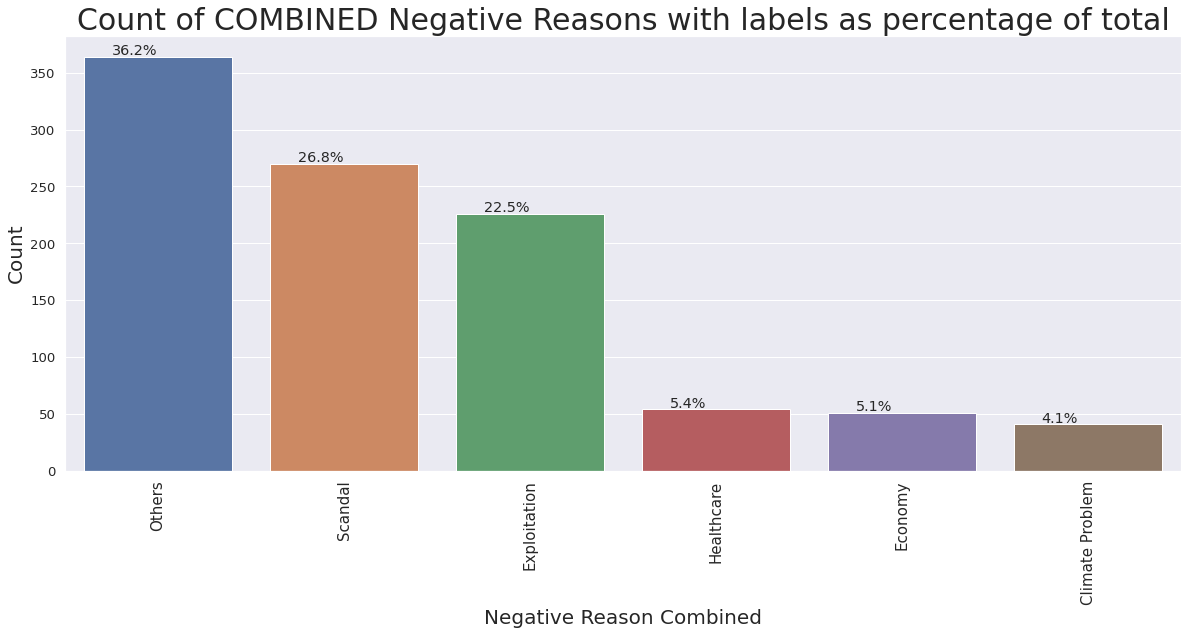

In [ ]:
plt.figure(figsize=(20,8))
# df_canadian_elec_all_negative['negative_reason'].value_counts()

ax4 = sns.countplot(x="combined_reason", data=df_canadian_elec_allneg_combined, order = df_canadian_elec_allneg_combined['combined_reason'].value_counts().index)
plt.xticks(rotation='vertical', fontsize="15")
ax4.set_xlabel('Negative Reason Combined', fontsize = '20')
ax4.set_ylabel('Count', fontsize = '20')
ax4.set_title('Count of COMBINED Negative Reasons with labels as percentage of total',  fontsize = '30')

for p, label in zip(ax4.patches, np.round(np.true_divide(df_canadian_elec_allneg_combined['combined_reason'].value_counts().values, df_canadian_elec_allneg_combined['combined_reason'].value_counts().sum()),3)):
    ax4.annotate("{0:.1%}".format(label), (p.get_x()+0.15, p.get_height()+1.5))

### Observation:

The data looks much better now and can be further processed for classification

## 5.3 Implimenting classification models

### Performing TF (Bag of words) (since it was the best performing word processing model for the previous section)

In [ ]:
X_elec_negcombined = df_canadian_elec_allneg_combined['cleaned_detokenized']
y_elec_negcombined = df_canadian_elec_allneg_combined['combined_reason']

In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text
# Also, we limit the words with max of 1000 features with maximum frequency to save computational time
count_vect_elec_negcomb = CountVectorizer(max_features = 1000)

# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
X_elec_negcombined_tf = count_vect_elec_negcomb.fit_transform(X_elec_negcombined)

X_elec_negcombined_tf_print = pd.DataFrame(np.round(X_elec_negcombined_tf.toarray(), 3), columns = count_vect_elec_negcomb.get_feature_names())
X_elec_negcombined_tf_print.head()

,ab,abc,ableg,abortion,abpoli,absolute,accept,access,account,accountable,acoyne,activist,actual,ad,afford,afraid,age,agenda,ago,agree,agreement,ahead,air,alberta,allow,allowed,allowing,althiaraj,american,andrew,andrewscheer,andy,answer,answering,antiabortion,antichoice,apply,approach,area,arrogance,...,website,weed,weird,well,west,western,weve,white,win,wing,winning,wk,woman,wonder,wondering,word,work,worked,working,worse,worst,worth,wow,wrong,xexx,xexxci,xexxcthe,xfxfxax,xfxfxx,xfxfxxbaxfxfxxb,yankeedoodleandy,yeah,year,yesterday,ygk,youll,young,youve,yr,yyc
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Model Implementation and Results (logistic regression + XGBoost + Random Forest + Decision Tree + Linear SVC) with hyper parameter tuning and cross val.

In [ ]:
logreg_report_elecnegcomb, logreg_acc_elecnegcomb, logreg_confusion_elecnegcomb, logreg_f1_score_elecnegcomb, logreg_pred_elecnegcomb, logreg_bs_elecnegcomb,logreg_bp_elecnegcomb = logistic_regression(X_elec_negcombined_tf, y_elec_negcombined, test_size=0.3, param = {'C':[0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
xgboost_model_report_elecnegcomb, xgboost_model_acc_elecnegcomb, xgboost_model_confusion_elecnegcomb, xgboost_model_f1_score_elecnegcomb, xgboost_model_pred_elecnegcomb, xgboost_model_bs_elecnegcomb, xgboost_model_bp_elecnegcomb = xgboost(X_elec_negcombined_tf, y_elec_negcombined, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

In [ ]:
random_forest_report_elecnegcomb, random_forest_acc_elecnegcomb, random_forest_confusion_elecnegcomb, random_forest_f1_score_elecnegcomb, random_forest_pred_elecnegcomb, random_forest_bs_elecnegcomb,random_forest_bp_elecnegcomb = random_forest(X_elec_negcombined_tf, y_elec_negcombined, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 3, test_size=0.3)

In [ ]:
decision_trees_report_elecnegcomb, decision_trees_acc_elecnegcomb, decision_trees_confusion_elecnegcomb, decision_trees_f1_score_elecnegcomb, decision_trees_pred_elecnegcomb, decision_trees_bs_elecnegcomb,decision_trees_bp_elecnegcomb = decision_trees(X_elec_negcombined_tf, y_elec_negcombined, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
linear_svc_report_elecnegcomb, linear_svc_acc_elecnegcomb, linear_svc_confusion_elecnegcomb, linear_svc_f1_score_elecnegcomb, linear_svc_pred_elecnegcomb, linear_svc_bs_elecnegcomb,linear_svc_bp_elecnegcomb = linear_svc(X_elec_negcombined_tf, y_elec_negcombined, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Log. Regression Model ----------------------\n')
print(logreg_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',logreg_confusion_elecnegcomb)
print('\n Best Tuning Score is =', logreg_bs_elecnegcomb)
print('\n Best Parameters are =', logreg_bp_elecnegcomb)

print('\n ---------------------- Term Frequency Random Forest Model ----------------------\n')
print(random_forest_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_elecnegcomb)
print('\n Best Tuning Score is =', random_forest_bs_elecnegcomb)
print('\n Best Parameters are =', random_forest_bp_elecnegcomb)

print('\n ---------------------- Term Frequency XG Boost Model ----------------------\n')
print(xgboost_model_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_elecnegcomb)
print('\n Best Tuning Score is =', xgboost_model_bs_elecnegcomb)
print('\n Best Parameters are =', xgboost_model_bp_elecnegcomb)

print('\n ---------------------- Term Frequency Decision Tree Model ----------------------\n')
print(decision_trees_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_elecnegcomb)
print('\n Best Tuning Score is =', decision_trees_bs_elecnegcomb)
print('\n Best Parameters are =', decision_trees_bp_elecnegcomb)

print('\n ---------------------- Term Frequency SVM Model ----------------------\n')
print(linear_svc_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_elecnegcomb)
print('\n Best Tuning Score is =', linear_svc_bs_elecnegcomb)
print('\n Best Parameters are =', linear_svc_bp_elecnegcomb)


 ---------------------- Term Frequency Log. Regression Model ----------------------

                 precision    recall  f1-score   support

Climate Problem       0.83      0.42      0.56        12
        Economy       0.64      0.44      0.52        16
   Exploitation       0.48      0.44      0.46        68
     Healthcare       1.00      0.19      0.32        16
         Others       0.54      0.74      0.63       109
        Scandal       0.64      0.54      0.59        81

       accuracy                           0.56       302
      macro avg       0.69      0.46      0.51       302
   weighted avg       0.59      0.56      0.55       302

Accuracy =  56.291%
F1 Score =  55.251% 

Confusion Matrix --------
 [[ 5  0  1  0  6  0]
 [ 1  7  2  0  5  1]
 [ 0  2 30  0 28  8]
 [ 0  1  3  3  5  4]
 [ 0  0 16  0 81 12]
 [ 0  1 11  0 25 44]]

 Best Tuning Score is = 0.5171000788022065

 Best Parameters are = {'C': 1, 'solver': 'saga'}

 ---------------------- Term Frequency Random For

### Analysing the model accuracies

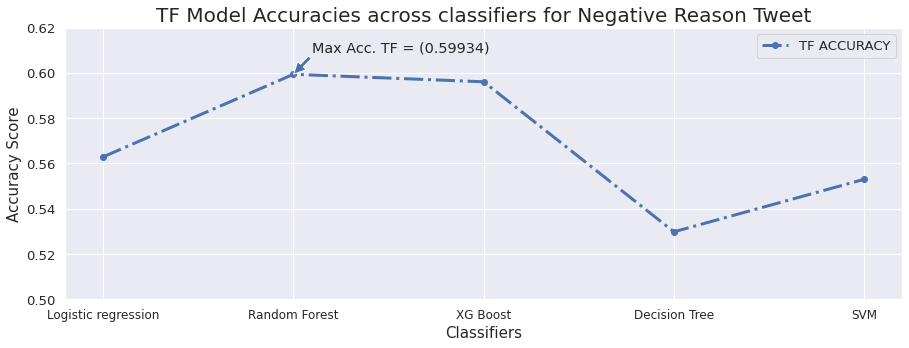

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

tf_acc_scores_negcomb = [logreg_acc_elecnegcomb, random_forest_acc_elecnegcomb, xgboost_model_acc_elecnegcomb, decision_trees_acc_elecnegcomb, 
                 linear_svc_acc_elecnegcomb]

classifiers_list_negcomb = ['Logistic regression', 'Random Forest', 'XG Boost', 'Decision Tree', 'SVM'] 

plt.subplot(1,1,1)
plt.plot(classifiers_list_negcomb, tf_acc_scores_negcomb, marker='o', color='b', linestyle='-.', linewidth=3, label = 'TF ACCURACY')
plt.xticks(np.arange(0,5,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
plt.ylim([0.5,0.62])
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('TF Model Accuracies across classifiers for Negative Reason Tweet', fontsize = '20')

ymax_negcomb = max(np.asarray(tf_acc_scores_negcomb, dtype=np.float32))
xmax_negcomb = np.where(tf_acc_scores_negcomb == np.amax(np.asarray(tf_acc_scores_negcomb)))[0]
plt.annotate('Max Acc. TF = (%.5f)'%(np.amax(np.asarray(tf_acc_scores_negcomb))), xy=(xmax_negcomb, ymax_negcomb), 
             xytext=(xmax_negcomb+0.1, ymax_negcomb+0.01), arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))


plt.legend()
plt.show()
    

### Observation:

**Random Forest** gives the best performance in terms of accuracy for predicting the 6 classes of the negative reasons. **59.934%**. Hence we will go ahead with the Random Forest model

In [ ]:
## making a dataframe of negative reasons correct predictions

df_canadian_elec_allneg_combined['negative_reason_pred'] = random_forest_pred_elecnegcomb
df_canadian_elec_allneg_combined['political_party'] = df_canadian_elec_2[df_canadian_elec_2['sentiment']=='Negative']['political_party']
df_canadian_elec_allneg_combined['combined_neg_reason_VS_prediction'] = 0

for i in df_canadian_elec_allneg_combined.index:
    if df_canadian_elec_allneg_combined['combined_reason'][i] == df_canadian_elec_allneg_combined['negative_reason_pred'][i]:
        df_canadian_elec_allneg_combined['combined_neg_reason_VS_prediction'][i] = 'Correct_Prediction'
    else:
        df_canadian_elec_allneg_combined['combined_neg_reason_VS_prediction'][i] = 'Wrong_Prediction'


df_canadian_elec_allneg_combined.head()

,negative_reason,cleaned_detokenized,combined_reason,negative_reason_pred,political_party,combined_neg_reason_VS_prediction
0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect w...,Healthcare,Healthcare,Conservative,Correct_Prediction
2,Economy,brantford going cost billion year justin elxn cdnpoli canada,Economy,Economy,Liberal,Correct_Prediction
4,Economy,canada taxpayer sick tired hard earned donated corporate welfare bum dont reason trudeaumustgo l...,Economy,Economy,Liberal,Correct_Prediction
5,Others,canadavotes elxn cdnpoli fact blastfromthepast conservative introduced longgun registry head pol...,Others,Others,Conservative,Correct_Prediction
8,Others,chooseforward cdnpoli elxncanada dont america mistake full frontal tb,Others,Others,None,Correct_Prediction


## Accuracy achieved by Random Forest for Negative Reasons = 59.934% on negative reason classification

# 6. RESULTS --------------------------------------------------------------------------------------------

## MODEL 1
### Sentiment Prediction of the Canadian Election Tweets

Text(0, 0.5, 'Count of Predictions')

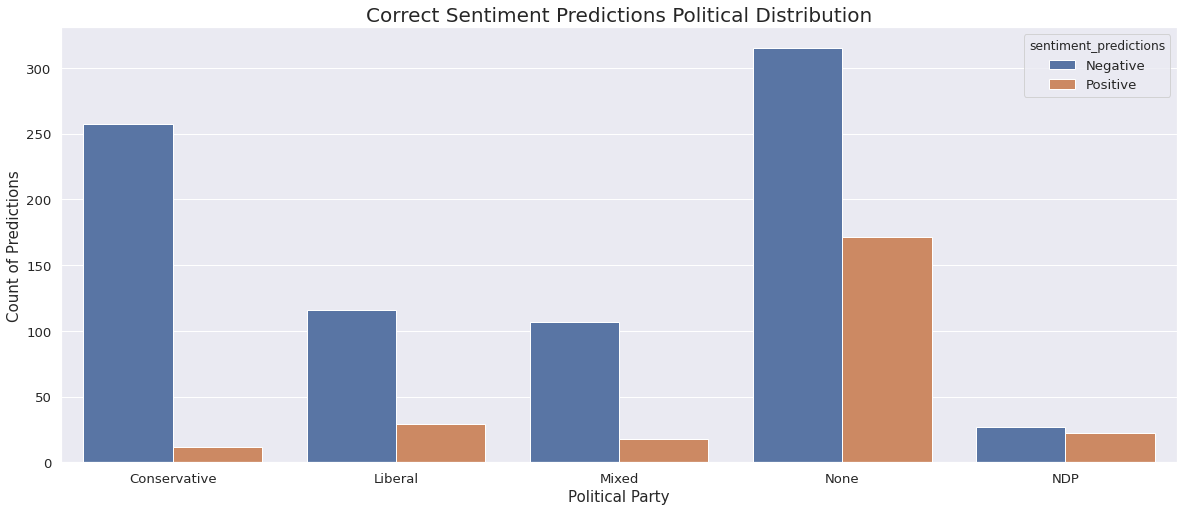

In [ ]:
plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,1)

plt.subplot(gs[0])
ax1 = sns.countplot(x="political_party", data=df_canadian_elec_2[df_canadian_elec_2['sentiment_vs_pred'] == 'Correct_Prediction'], hue='sentiment_predictions')
ax1.set_title('Correct Sentiment Predictions Political Distribution', fontsize = 20)
ax1.set_xlabel('Political Party', fontsize = 15)
ax1.set_ylabel('Count of Predictions', fontsize = 15)


## Model 2
### Negative Reason Prediction of the negative political tweets

Text(0.5, 1.0, 'Correctly predicted negative reasons COMBINED categories')

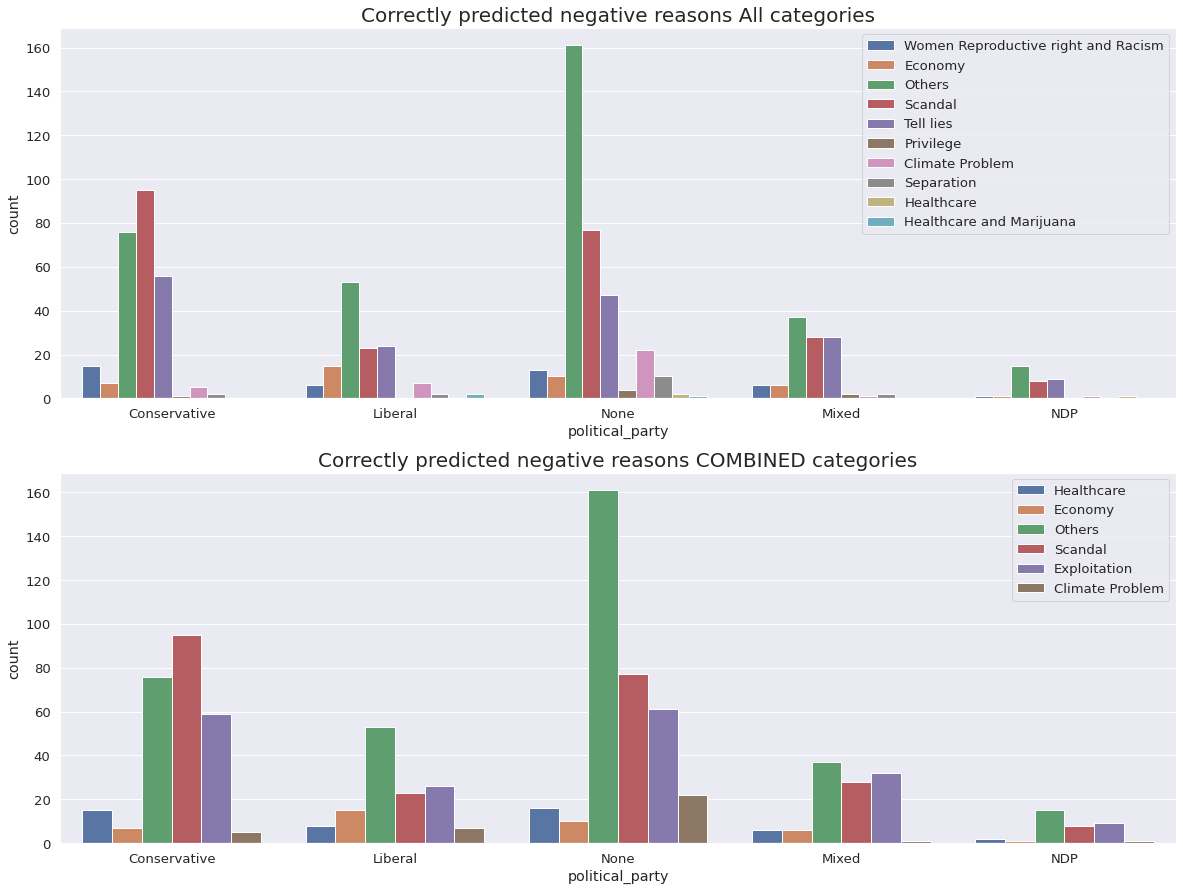

In [ ]:
## Looking at the distribution of negative tweets in correct predictions
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2,1)

plt.subplot(gs[0])
# plt.figure(figsize=(20,8))
ax = sns.countplot(x="political_party", data=df_canadian_elec_allneg_combined[(df_canadian_elec_allneg_combined['combined_neg_reason_VS_prediction']=='Correct_Prediction')], hue='negative_reason')
plt.legend(loc='upper right')
ax.set_title('Correctly predicted negative reasons All categories', fontsize = '20')

plt.subplot(gs[1])
ax1 = sns.countplot(x="political_party", data=df_canadian_elec_allneg_combined[(df_canadian_elec_allneg_combined['combined_neg_reason_VS_prediction']=='Correct_Prediction')], hue='negative_reason_pred')
plt.legend(loc='upper right')
ax1.set_title('Correctly predicted negative reasons COMBINED categories', fontsize = '20')

### --------- RESEARCH QUESTION: ---------
 **Based on Model 1**; What can public opinion on Twitter tell us about the Canadian political landscape in 2019?

### --------- ANSWER ---------
Through NLP analysis of the tweets, we found that the Conservative party has a very high negative sentiment presence with respect to positive. Moreover, Liberals has a lower negative tweet count than the Conservatives, but they also had the maximum number of positive tweets out of all three parties. NDP had good negative to positive tweet ratio, but their overall presence over twitter was quite low suggesting low popularity amongst the public.

Moreover, the total positives of the none and mixed categories surpassed the combined positives of all the three parties, suggesting that the public was somewhat satisfied with the existing governemnt (Liberal Party). Hence the NLP analysis suggests that Liberal Party has a more chances of winning according to the twitter data.

Also, from the negative reason graph, it is evedint that the major negativity around Conservatives is of 'Scandal' and 'Tell Lies', which aren't so prominant for the other parties. Hence, this suggests that people associate deciet, dishonesty and scandolous behaviour from Conservative Party.

Hence, all these tweets act as an indicator of what shape the political landscape is taking. And the same was reflected in the elections results where, as suggested by our NLP analysis, the Liberal Party won.

### --------- RESEARCH QUESTION: ---------
**Based on Model 2**; provide a few reasons why your model may fail to predict the correct negative reasons. Back up your  reasoning with examples from the test sets.

### --------- ANSWER ---------
The model may fail to make predictions correcty, being the achieved accuracy as 59.934%. **Lets Explore the model 2 dataset to substantiate the answer** =

### Exploring the Model 2 dataset from our dataset as follows 

In [ ]:
## Number of Samples - 

df_canadian_elec_allneg_combined['combined_reason'].value_counts()

Others             364
Scandal            270
Exploitation       226
Healthcare          54
Economy             51
Climate Problem     41
Name: combined_reason, dtype: int64

### Observation:

The Dataset containes skewed data, with the categories like Healthcare, Economy and Climate Problems have almost 50 examples each, whereas, the other three categories have an average of 270 categories each. This may cause a bias in the learning algorithm for it would be generalised on the categories with maximum frequency ('Others', 'Scandal', 'Exploitation')

In [ ]:
## Generating 3 random samples
samples1=df_canadian_elec_allneg_combined.sample(4, random_state=512)

## Printing Actual reason vs Predicted reason
samples1[['combined_reason','negative_reason_pred', 'combined_neg_reason_VS_prediction']]

,combined_reason,negative_reason_pred,combined_neg_reason_VS_prediction
907,Exploitation,Exploitation,Correct_Prediction
91,Scandal,Scandal,Correct_Prediction
1876,Economy,Climate Problem,Wrong_Prediction
2091,Scandal,Scandal,Correct_Prediction


### Observation: 

As we can see that the random sample has 1 wrong prediction for the index 1876. Lets Explore what the tweet was...

In [ ]:
## Printing the tweet for the incorrect prediction (index no. 181)
samples1['cleaned_detokenized'][1876]

'trudeaundp coalition coalition cant afford radical position pipeline development fewer job canadian future revenue health care education social service canada cdnpoli elxn'

### Observation:

It is evident from the tweet above that it fall under 'Economy' category for revenue healthcare and education but our model predicted wrongly. This could happen as there are very few examples of 'Economy' and our model has become too generalised on the major classes like 'Others'

In [ ]:
## Generating 3 random samples
samples2=df_canadian_elec_allneg_combined.sample(4, random_state=923)

## Printing Actual reason vs Predicted reason
samples2[['combined_reason','negative_reason_pred', 'combined_neg_reason_VS_prediction']]

,combined_reason,negative_reason_pred,combined_neg_reason_VS_prediction
1556,Exploitation,Exploitation,Correct_Prediction
210,Exploitation,Others,Wrong_Prediction
499,Others,Others,Correct_Prediction
1650,Others,Others,Correct_Prediction


In [ ]:
## Printing the tweet for the incorrect prediction (index no. 755)
samples2['cleaned_detokenized'][210]

'andrew scheer think small business owner mailing reducing federal regulation cra sound protecting average person rocket science taxeselxn'

### Observation:

It is evident from the tweet above that it fall under 'Exploitation' category for elections but our model predicted 'Others'.

### Since we got a few samples of our classes in the negative reasons, we get a lower accuracy of the model

### --------- RESEARCH QUESTION: ---------
For both models, suggest one way you can improve the accuracy of your models.

### --------- ANSWER ---------

1. More samples can be acquired to build and train a solid and robust model (Strongly applicable in Second Model)
2. The Hyper Parameters of the model can be tuned
3. Text Cleaning could be modified by changing the stop words removal, so that any key important words arent removed. Also, the words joint together can be separated so that each word can contribute for the model learning
4. Increasing the number of max_features in CountVectorizer/TF-IDF Vectorizer to get more features to build model

# 7. BONUS -----------------------------------------------------------------------------------------------

## 7.1 Using Word2Vec Model instead of TF (Bag of Words)

Word2Vec is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words. It takes as its input a large corpus of words and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

Source: https://israelg99.github.io/2017-03-23-Word2Vec-Explained/

In [ ]:
size=200 # Defining the size of vector of each word (200x1 size vector in this case)

tokenized_sentences = [sentence.split() for sentence in df_sentiments_1['cleaned_detokenized']] # tokenizing each word from the general dataset corpus
model_word2vec = word2vec.Word2Vec(tokenized_sentences, size=size, min_count=1) # building word2vec model from tokenized words
# To make the model memory efficient
model_word2vec.init_sims(replace=True)

In [ ]:
df_senti_w2v = np.concatenate([word2vec_builder(z, size) for z in X_senti])

### 7.1.1 Implementing All the classification models with w2v (Logistic Regression, SVM, decision tree, random forest, XG Boost) with hyper parameter tuning and cross val.

In [ ]:
logreg_report_w2v_senti, logreg_acc_w2v_senti, logreg_confusion_w2v_senti, logreg_f1_score_w2v_senti, _,_,_ = logistic_regression(df_senti_w2v, y_senti, test_size=0.3, param = {'C':[0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
linear_svc_report_w2v_senti, linear_svc_acc_w2v_senti, linear_svc_confusion_w2v_senti, linear_svc_f1_score_w2v_senti, _,_,_ = linear_svc(df_senti_w2v, y_senti, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
decision_trees_report_w2v_senti, decision_trees_acc_w2v_senti, decision_trees_confusion_w2v_senti, decision_trees_f1_score_w2v_senti, _,_,_ = decision_trees(df_senti_w2v, y_senti, param = {'criterion':['gini', 'entropy']}, cv=2, test_size=0.3)

In [ ]:
random_forest_report_w2v_senti, random_forest_acc_w2v_senti, random_forest_confusion_w2v_senti, random_forest_f1_score_w2v_senti, _,_,_ = random_forest(df_senti_w2v, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 2, test_size=0.3)

In [ ]:
xgboost_model_report_w2v_senti, xgboost_model_acc_w2v_senti, xgboost_model_confusion_w2v_senti, xgboost_model_f1_score_w2v_senti, _,_,_ = xgboost(df_senti_w2v, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 2, test_size=0.3)

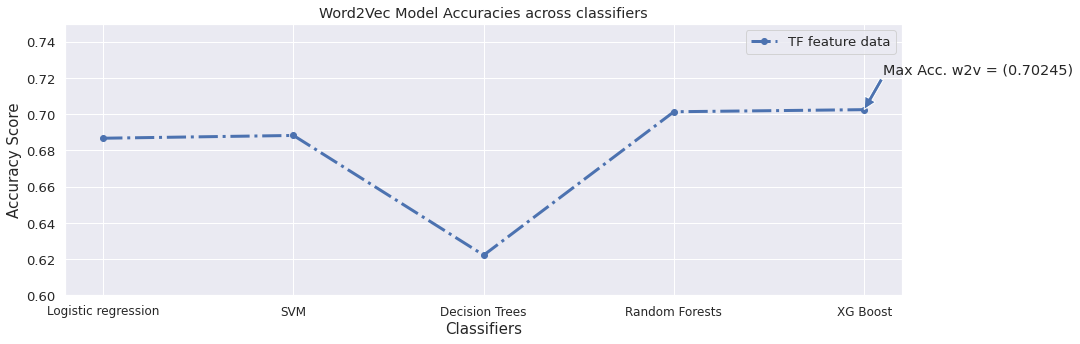

In [ ]:

fig, ax = plt.subplots(1,1,figsize=(15,5))
w2v_acc_scores = [logreg_acc_w2v_senti, linear_svc_acc_w2v_senti, 
                 decision_trees_acc_w2v_senti, random_forest_acc_w2v_senti, xgboost_model_acc_w2v_senti]

classifiers_list = ['Logistic regression', 'SVM', 'Decision Trees', 'Random Forests', 'XG Boost']

plt.subplot(1,1,1)
plt.plot(classifiers_list, w2v_acc_scores, marker='o', color='b', linestyle='-.', linewidth=3, label = 'TF feature data')
plt.xticks(np.arange(0,5,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
plt.ylim([0.6,0.75])
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('Word2Vec Model Accuracies across classifiers')

ymax_w2v = max(np.asarray(w2v_acc_scores, dtype=np.float32))
xmax_w2v = np.where(w2v_acc_scores == np.amax(np.asarray(w2v_acc_scores)))[0]
plt.annotate('Max Acc. w2v = (%.5f)'%(np.amax(np.asarray(w2v_acc_scores))), xy=(xmax_w2v, ymax_w2v),
             xytext=(xmax_w2v+0.1, ymax_w2v+0.02), arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))

plt.legend()
plt.show()

### Observation:

Since the max accuracy achieved from word2vec was **70.273%** (XG Boost), which is less than that the accuracy achieved via Bag of words (TF) which was **73.365% (Logistic Regression)**. Hence, word2vec did not prove to be helpful in this technique. So, we move on to the ngrams technique

## Max Accuracy word2vec 70.273% (XG Boost) < TF 73.365% (Logistic Regression)


## 7.2 Implementing N-Grams in combination with Bag of Words 

since we know bag of words performed better than tfidf in the previous models

A more sophisticated approach is to create a vocabulary of grouped words. This changes both the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.
In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams.

https://medium.com/analytics-vidhya/fundamentals-of-bag-of-words-and-tf-idf-9846d301ff22

In [ ]:
## Initializing with a trigram in Bag of words with maximum features as 6000
vectorizer_ngrams_senti = TfidfVectorizer(use_idf=False, smooth_idf=True, norm=None, max_features=6000, ngram_range=(1,3))
df_senti_ngrams = vectorizer_ngrams_senti.fit_transform(X_senti)

### 7.2.1 Implementing All the classification models with N-Grams (Logistic Regression, SVM, decision tree, random forest, XG Boost) with hyper parameter tuning and cross val.

In [ ]:
logreg_report_ngram_senti, logreg_acc_ngram_senti, logreg_confusion_ngram_senti, logreg_f1_score_ngram_senti, _, logreg_bs_ngram_senti, logreg_bp_ngram_senti = logistic_regression(df_senti_ngrams, y_senti, test_size=0.3, param = {'C':[0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
linear_svc_report_ngram_senti, linear_svc_acc_ngram_senti, linear_svc_confusion_ngram_senti, linear_svc_f1_score_ngram_senti, _, linear_svc_bs_ngram_senti, linear_svc_bp_ngram_senti = linear_svc(df_senti_ngrams, y_senti, param = {'C':[0.01,0.05,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
decision_trees_report_ngram_senti, decision_trees_acc_ngram_senti, decision_trees_confusion_ngram_senti, decision_trees_f1_score_ngram_senti, _, decision_trees_bs_ngram_senti, decision_trees_bp_ngram_senti = decision_trees(df_senti_ngrams, y_senti, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
random_forest_report_ngram_senti, random_forest_acc_ngram_senti, random_forest_confusion_ngram_senti, random_forest_f1_score_ngram_senti, _, random_forest_bs_ngram_senti, random_forest_bp_ngram_senti = random_forest(df_senti_ngrams, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 3, test_size=0.3)

In [ ]:
xgboost_model_report_ngram_senti, xgboost_model_acc_ngram_senti, xgboost_model_confusion_ngram_senti, xgboost_model_f1_score_ngram_senti, _, xgboost_model_bs_ngram_senti, xgboost_model_bp_ngram_senti = xgboost(df_senti_ngrams, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

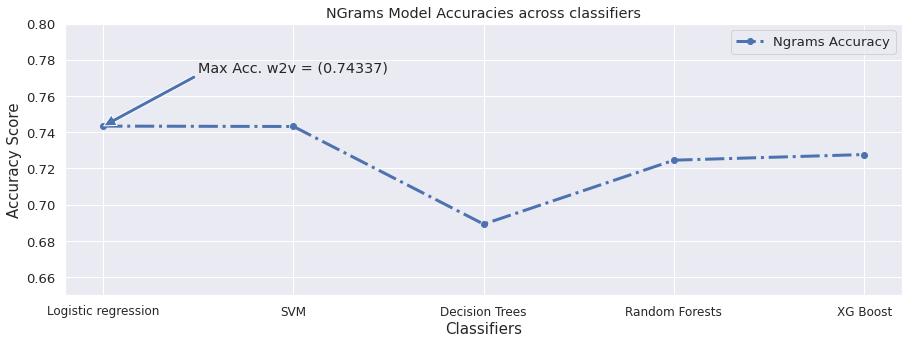

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ngrams_acc_scores = [logreg_acc_ngram_senti, linear_svc_acc_ngram_senti, 
                 decision_trees_acc_ngram_senti, random_forest_acc_ngram_senti, xgboost_model_acc_ngram_senti]

classifiers_list = ['Logistic regression', 'SVM', 'Decision Trees', 'Random Forests', 'XG Boost'] 

plt.subplot(1,1,1)
plt.plot(classifiers_list, ngrams_acc_scores, marker='o', color='b', linestyle='-.', linewidth=3, label = 'Ngrams Accuracy')
# plt.plot(classifiers_list, tfidf_acc_scores, marker='o', color='y', linewidth=3, label = 'TF-IDF feature data')
plt.xticks(np.arange(0,5,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
plt.ylim([0.65,0.8])
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('NGrams Model Accuracies across classifiers')

ymax_ngrams = max(np.asarray(ngrams_acc_scores, dtype=np.float32))
xmax_ngrams = np.where(ngrams_acc_scores == np.amax(np.asarray(ngrams_acc_scores)))[0]
plt.annotate('Max Acc. w2v = (%.5f)'%(np.amax(np.asarray(ngrams_acc_scores))), xy=(xmax_ngrams, ymax_ngrams), 
             xytext=(xmax_ngrams+0.5, ymax_ngrams+0.03), arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))

plt.legend()
plt.show()

### Observation:

Since the accuracy with the **ngrams** technique was **74.337% (Logistic Regression)** which is greater than the one obtained by **Bag of words (73.365%)**, hence we go ahead with ngrams and try out 2019 election predictions

## Max Accuracy ngram 74.337% (Logistic Reg.) > TF 73.365% (Logistic Reg)

### 7.2.2 Implimenting Log reg general model on elections data set

In [ ]:
## Initializing with a trigram in bag of words
vectorizer_ngrams_elec = TfidfVectorizer(use_idf=False, smooth_idf=True, norm=None, max_features=6000, ngram_range=(1,3))
df_elec_ngrams = vectorizer_ngrams_elec.fit_transform(X_elec)

In [ ]:
## Applying logistic regression model

logreg_model_tuned_sentiments_ngrams = LogisticRegression(random_state=1624, solver = logreg_bp_ngram_senti['solver'], C=logreg_bp_ngram_senti['C']).fit(df_senti_ngrams, y_senti)
logreg_model_tuned_pred_ngrams = logreg_model_tuned_sentiments_ngrams.predict(df_elec_ngrams) 
logreg_tuned_report_ngrams = classification_report(y_elec,logreg_model_tuned_pred_ngrams)
logreg_tuned_acc_ngrams = accuracy_score(y_elec, logreg_model_tuned_pred_ngrams)
logreg_tuned_confusion_ngrams = confusion_matrix(y_elec, logreg_model_tuned_pred_ngrams)
logreg_tuned_f1_score_ngrams = f1_score(y_elec, logreg_model_tuned_pred_ngrams)

In [ ]:
print('\n ---------------------- N-GRAM General Tweet Log. Regression Model ON Election SET ----------------------\n')
print(logreg_tuned_report_ngrams)
print('Accuracy = ', "{0:.3%}".format(logreg_tuned_acc_ngrams))
print('F1 Score = ', "{0:.3%}".format(logreg_tuned_f1_score_ngrams), '\n')
print('Confusion Matrix --------\n',logreg_tuned_confusion_ngrams)


 ---------------------- N-GRAM General Tweet Log. Regression Model ON Election SET ----------------------

              precision    recall  f1-score   support

           0       0.47      0.60      0.53      1006
           1       0.53      0.40      0.46      1127

    accuracy                           0.50      2133
   macro avg       0.50      0.50      0.49      2133
weighted avg       0.50      0.50      0.49      2133

Accuracy =  49.695%
F1 Score =  45.890% 

Confusion Matrix --------
 [[605 401]
 [672 455]]


### The Accuracy obtained with ngram model with Logistic Regression is 49.742%